# TWITTER HASHTAG NETWORKS ANALYSIS

### Library Imports

In [1]:
# Scrape Twitter tweets
import snscrape.modules.twitter as sntwitter

# Networkx imports for network creating/visualisation
import networkx as nx
from pyvis.network import Network
from networkx.algorithms import bipartite

# Crucial data science libraries
import pandas as pd
from collections import Counter
from statistics import mean
import numpy as np
np.set_printoptions(suppress=True) # Avoid printing scientific notation
import json
import ast
from sklearn.metrics.cluster import normalized_mutual_info_score

# Hierarchical clustering
from scipy.cluster import hierarchy 
from scipy.spatial import distance

# Helper libraries
import os
import copy

# Visualisation tool
import matplotlib.pyplot as plt

#### (1) Dataset you would like to extract and use: select (at least) 2 hashtags of your choice to create a Twitter hashtag (co-occurrence) network for each of them. Explain the structure of hashtag networks and motivate your hashtag choice, for example, by choosing timely issues (e.g., #ClimateChange), controversial (political) topics (e.g., #Brexit) and/or very general fields of knowledge (e.g., #Science). [15 points]

The two hashtags chosen for this project to be analysed are based on my personal interest in the investing world and the exploration of the bleak economic outlook the world is currently faced with. Specifically, the hashtags are ‘#Investing’ & ‘#Economy. My expectation is that there may some form of crossover, such as where both hangtags are mentioned in a single user tweet. Both hashtags are relevant in the current economic outlook. Investing is a very general term which encompasses a variety of asset classes, from the stock market to crypto and real-estate. It would therefore be interesting to explore the relationships and conversations within the #Inveting bracket and predominantly explore to what extent cryptocurrency has penetrated this topic of conversation. Crypto has become immensely popular over the recent decade, with no signs of slowdown. Thousand of cryptocurrency coins have been coded, released and cashed in by the predominantly younger generations. Crypto is also intertwined with blockchain, a technology capable to transforming most business operations, from banking to personal information encryption. Web3.0 & Metaverse at their cores are with this technology which should become evident when examining the hashtag network. 

The economy hashtag aims to explore the main topics of conversation based around the rising world-wide inflation and bleak short/medium term economic outlook. I would expect that both crypto and investing will also be intertwined within these conversation topics which are heavily influenced by the economic outlook. In times of turmoil, investing in certain asset groups such as gold/silver and real-estate has been the defensive bulwark in wealth building and asset protection. Additionally crypto has also been added to this defensive commodity list which should be a key topic within the hashtag network. 

Hashtags networks can be visualised and structured through a Co-occurrence network, also known as Bipartite network. In this network, each link connects two different types of nodes. In this specific case of hashtag networks, each edge is a directional link, emanating from the user to the hashtag(s). The user node only projects hashtags, therefore its out degree is greater than 1 and its in degree is always 0. Hashtag nodes on the other hand are the exact opposite, they only exhibit in degrees, no out degree. Two accompanying definitions accompany this network type, user/hashtag co-occurrence. Two hashtags co-occur if there are one or more users mentioning both hashtag in a tweet. Alternately two users co-occur if there are one or more hashtags mentioned by both users. A hashtag network may also be interpreted through a projected format whereby either the user or hashtag co-occurring nodes are used to form the projected network.

#### (2) Explain the extraction of the dataset and data cleansing operations. In particular, you should access the Twitter API v1.1 via the Twython Python package, collect (at least) 10,000 tweets related to each of the hashtags in (1) and save results locally in JSON files (one for each hashtag). [10 points]

My request for ‘elevate’ access was denied by Twitter which forced me to take a different path to procuring a dataset of my choosing. While it would have been possible to use the V2 API, it did not allow the viewing of the full text of the tweet, it was cut short tin most cases, thereby also excluding the hashtags which are typically at the end of the tweet. As such my dataset was incomplete.

As a counter to this issue, I used the ‘snscrape’ module to procure both hashtag datasets. Using this module the chosen hashtag was scraped from Twitter with the corresponding twitter user, saved into a data frame and directly into a .csv file. I have taken the liberty of saving the tweets as .csv and performing the data cleaning operations in a data frame given that the data procurement process was modified from the provided material.

Data cleansing operation will be actioned at a later stage when each file is loaded into data frames.

In [2]:
def scrape_tweets(hashtag, nmb_tweets):
    """
    Enter the tweet desired to be scraped in string format as first value.
    Second value represents the number of tweets to scrape.
    """
    
    # List to hold tweets
    tweets_list = []

    # Scrape a desired number of tweets in English
    for i,tweet in enumerate(sntwitter.TwitterHashtagScraper(f'{hashtag} lang:en').get_items()):
        if i > nmb_tweets:
            break
        tweets_list.append([tweet.user.username, tweet.hashtags])

    # Crreate and fill dataframe using tweet data
    df = pd.DataFrame(tweets_list, columns=['username', 'hashtags'])
    
    # Save tweets to a csv file
    df.to_csv(r'C:\***\***\***\Jupyter Notebook\Network Science\twitter_' + hashtag + '.csv', index = False)

For each dataset 16,000 tweets were scraped and saved locally into a csv file.

In [3]:
# scrape_tweets('Economy', 15999)

In [4]:
# scrape_tweets('Investing', 15999)

#### (3) Explain the potential restriction impacting the dataset, for example: data quality, 4 Vs. [5 points]

The quality of the dataset is paramount to the success of the potential project and analysis. Data quality can be defined as the accuracy, completeness, consistency and reliability of a dataset. Closely managing these qualities allows organisations and individuals to identify potential errors in the dataset and rectify them before using the data to make business decisions. 

These aspects of data quality come under stress due to a number of factors. Firstly the majority of revenue and twitter usage comes from the United States of America, highlighting that the dataset is inherently biased to one part of the world. Therefore the completeness of the dataset is questionable as not all parts of the world are taken into account. Furthermore the hashtag scraping method was set to scrape tweets in English, for the purpose of simplifying the data cleansing process. Secondly it is well known that a large number of bots inhabit Twitter, with official claims that only 5% of users are bots while other sources claim up to 80%. Either way the reliability of tweets is brought into question. Lastly, as with any social media platform, there are a number of fake user accounts, either malicious or parody which further impact the reliability of tweets and therefore hashtags.

The four V’s are predominantly used to characterise big data and relate to: volume, velocity, variety and veracity. These aspects will be used to describe the scraped datasets. 

Volume refers to the quantity of data. Both datasets in question are comprised of 16,000 tweets, divided into two columns. The first column, represents the tweets creator denoted by the user name, the second column holds all hashtags associated with the tweet. The volume is admittedly very small compared to the daily output of Twitter. A quick Google search reveals that there are roughly 500 million tweets posted on a daily basis, significantly overshadowing both datasets. 
Velocity refers to the speed of the data, as it is generated and transferred between two points. This dataset is static, it is not actively updated and so its velocity can be described as 0.

Variety is the third characteristic and refers to the three types of data one may encounter: unstructured, semi-structured and structured. The data contained within this dataset is structured, given that the information required for analysis is bound in .csv files only.

Veracity is the final characteristic of big data and it refers to the accuracy and quality of the data. Both of these aspects have been covered in the data quality section. In conclusion, while the majority of tweets would be deemed as accurate and genuine, an unknown number of bots and fake accounts contaminate the dataset. 

#### (4) What are the elements to consider when analysing your data from a social media perspective? For example, misinformation, bot, legislation. [5 points]

The key elements to consider when analysing social media datasets are the prevalence of bots and misinformation perpetuated by either bots or malicious users. As previously discussed, bots account for an unknown number of users on the Twitter social media platform. The official number of bots as provided by Twitter is 5% of all users. Other sources indicate a much higher bot prevalence, from 15% as reported by a Reuters research team, to a staggering 80% as reported by former FBI security specialist. 

The aspect of misinformation is also a key concern when exploring a social media dataset. Fake accounts have been prevalent in spreading misinformation on a number of high profile events, such as Covid19 for example.  Such misinformation possible to led to unnecessary loss of life, which is an ultimate consequence of this type of malicious misinformation. Additionally shortly after Elon Musk’s acquisition of Twitter a large number of parody accounts sprung up which perfectly mimicked the original companies/creators, damaging the organisations/individuals reputation or financial well-being. 

The legislative act protecting data ownership and rights of Twitter users is the General Data Protection Regulation (GDPR) which has been in effect since 2018 which was built upon the pre-existing European Union approach to data privacy and protection. Additionally with the exit of the United Kingdom from the EU in 2021, the UK version of the GDPR has been in effect which is similar to the EU GDPR. California and other US state Privacy Laws are governed by the California Consumer Privacy Act of 2018 (CCPA). 

#### (5) Process each JSON file saved in (2) to create – for each of them – a Twitter bipartite user/hashtag network, project it onto a hashtag (co-occurrence) network and filter it to keep only those links connecting hashtag pairs mentioned together by at least n users (e.g., n = 10). Remove the original query hashtag (as it will be connected with every other hashtag). You should now have (at least) two networks. Are these networks directed or undirected, weighted or unweighted? [15 points]

As previously mentioned, due to the different technique used in procuring the dataset, it has been saved as a csv file. This file will then be read into a pandas data frame and standardised accordingly. Primarily the two data cleaning methods required to be undertaken are to lower case the hashtags and add the appropriate ‘#’ to signify that the word is a hashtag.

In [5]:
# Reading in each file and evaluating the hashtag column as a list
economy_df = pd.read_csv('twitter_economy.csv', converters={'hashtags': pd.eval})

# Lower casing the hashtag column
economy_df['hashtags'] = economy_df['hashtags'].map(lambda x: list(map(str.lower, x)))

# Adding a '#' to each hashtag
economy_df['hashtags'] = ([list(('#' + tag for tag in tweet)) for tweet in economy_df['hashtags']])

In [6]:
# Reading in each file and evaluating the hashtag column as a list
investing_df = pd.read_csv('twitter_investing.csv', converters={'hashtags': pd.eval})

# Lower casing the hashtag column
investing_df['hashtags'] = investing_df['hashtags'].map(lambda x: list(map(str.lower, x)))

# Adding a '#' to each hashtag
investing_df['hashtags'] = ([list(('#' + tag for tag in tweet)) for tweet in investing_df['hashtags']])

The majority of the below code was taken from the lecture provided material found in NS_T09_code.py, tweaked slightly to fit the dataframe object.

In [7]:
def directed_graph(df):
    """
    Take the dataframe object and return a graph and the unique hashtag list.
    """
    
    # Initialising graph
    G = nx.DiGraph()

    # List to store all nodes
    hashtag_nodes = []

    # Iterating through user/hashtag list and creating the nodes and links
    for user, htags in zip(df.username, df.hashtags):
        for htag in htags:
            my_edge = (user, htag)
            G.add_edge(*my_edge)
            if not (htag in hashtag_nodes):
                hashtag_nodes.append(htag)
            G.nodes[user]['type'] = 'user'
            G.nodes[htag]['type'] = 'hashtag'
            
    return G, hashtag_nodes

In [8]:
# Creating the investing graph and hashtag list

investing_DG, investing_htags = directed_graph(investing_df)

In [9]:
print(f'Directed Network: {nx.is_directed(investing_DG)}')
print(f'Weighted Network: {nx.is_weighted(investing_DG)}')
print(f'Number of unique investing hashtags: {len(investing_htags)}')

Directed Network: True
Weighted Network: False
Number of unique investing hashtags: 9102


In [10]:
# Creating the economy graph and hashtag list

economy_DG, economy_htags = directed_graph(economy_df)

In [11]:
print(f'Directed Network: {nx.is_directed(economy_DG)}')
print(f'Weighted Network: {nx.is_weighted(economy_DG)}')
print(f'Number of unique economy hashtags: {len(economy_htags)}')

Directed Network: True
Weighted Network: False
Number of unique economy hashtags: 11761


Both networks examined are directed but unweighted.

#### Bipartite Hashtag (Co-occurence) Network

Both networks will now be transformed into bipartite networks and filtered.

The majority of the code found in the below fucntion was taken from the lecture notes found in NS_T09_code.py.

In [12]:
def filter_network(G_htag, min_U=0, remove_node='', k_core=1):
    """
    The function filters the network based on the requirements of the analysis. 
    A graph is taken as input, the minimum number of users to filter each hashtag by 
    and the k_core filtering method. 
    The output is a graph with all filters applied.
    Shows the pre & post number of nodes and edges for comparison.
    """
    
    print(f'Pre-filter no. nodes: {len(G_htag.nodes())}')
    print(f'Pre-filter no. edges: {len(G_htag.edges())}\n')
    
    # Remove nodes below the minimum number of  users
    G_htag_copy = G_htag.copy()
    for e in G_htag_copy.edges(data=True):
        if(e[2]['weight']<min_U):
            G_htag.remove_edge(e[0], e[1])
            
    # Remove the desired node from the graph
    G_htag.remove_node(remove_node)
    
    # Build the k_core graph
    G_htag = nx.k_core(G_htag, k_core)
        
    print(f'Post-filter no. nodes: {len(G_htag.nodes())}')
    print(f'Post-filter no. edges: {len(G_htag.edges())}')
    
    return G_htag

In [13]:
# Creating the bipartite network for the investing graph

investing_BG = bipartite.weighted_projected_graph(investing_DG.to_undirected(), investing_htags, ratio=False)

In [14]:
# Filtering the network, removing the original hashtag and creating a k_core of 1

filtered_inv_BG = filter_network(investing_BG, min_U=20, remove_node = '#investing', k_core=1)

Pre-filter no. nodes: 9102
Pre-filter no. edges: 283631

Post-filter no. nodes: 99
Post-filter no. edges: 440


In [15]:
# Creating the bipartite network for the economy graph

economy_BG = bipartite.weighted_projected_graph(economy_DG.to_undirected(), economy_htags, ratio=False)

In [16]:
# Filtering the network, removing the original hashtag and creating a k_core of 1

filtered_ecn_BG = filter_network(economy_BG, min_U=20, remove_node = '#economy', k_core=1)

Pre-filter no. nodes: 11761
Pre-filter no. edges: 463881

Post-filter no. nodes: 86
Post-filter no. edges: 302


#### (6) To make a comparative analysis of the networks in (5), you can compute different metrics that help you rank and distinguish between them. For instance, for each network, you may consider the number of nodes and links, the density, the average node degree, its assortativity, whether it is connected and the number of connected components. [10 points]

For the purpose of the analysis and comparison between both hashtags the  non_filtered bipartite, graph is used. This decision is due the decision of removing nodes below a certain limit as well as choosing an appropriate k_core, which will drastically alter some of the results of the analysis. For this reason, the original unaltered graph was used in this section. 

In [17]:
print(f'Number of Nodes: {investing_DG.number_of_nodes()}')
print(f'Number of Edges: {investing_DG.number_of_edges()}')
print(f'Network Density: {round(nx.density(investing_DG), 5)*100}%')
print(f'Network Average Degree is {mean(dict(investing_DG.degree()).values())}')
print(f'Graph Weakly Connected: {nx.is_weakly_connected(investing_DG)}')
print(f'Number of Weakly Connected Components: {len(list(nx.weakly_connected_components(investing_DG)))}')
print(f'Degree assortativity of the Network: {nx.degree_assortativity_coefficient(investing_DG)}')

Number of Nodes: 13312
Number of Edges: 34335
Network Density: 0.019%
Network Average Degree is 5.158503605769231
Graph Weakly Connected: True
Number of Weakly Connected Components: 1
Degree assortativity of the Network: -0.15871065883751173


In [18]:
print(f'Number of Nodes: {economy_DG.number_of_nodes()}')
print(f'Number of Edges: {economy_DG.number_of_edges()}')
print(f'Network Density: {round(nx.density(economy_DG), 5)*100}%')
print(f'Network Average Degree is {mean(dict(economy_DG.degree()).values())}')
print(f'Graph Weakly Connected: {nx.is_weakly_connected(economy_DG)}')
print(f'Number of Weakly Connected Components: {len(list(nx.weakly_connected_components(economy_DG)))}')
print(f'Degree assortativity of the Network: {nx.degree_assortativity_coefficient(economy_DG)}')

Number of Nodes: 17712
Number of Edges: 44542
Network Density: 0.013999999999999999%
Network Average Degree is 5.029584462511292
Graph Weakly Connected: True
Number of Weakly Connected Components: 1
Degree assortativity of the Network: -0.1449333324182487


The number of nodes and edges is considerable higher in the economy graph versus the investing graph. This signifies that the economy graph contains more hashtags per tweet.

Both networks are also extremely sparse, not even reaching 1% density. The investing graph is slightly denser by 0.05% however this imbalance could arise from the randomness of the scrape function during dataset procurement.

The network average degree is approximately 5 for both graphs.  

Both graphs are also weakly connected, which implies that it is possible to reach any node starting from any other node in the graph. The number of connected components in both graphs is 1, as all nodes are weakly connected to each other.

Finally the degree assortativity coefficient for both networks is negative, around -0.15. This signifies that nodes of high degree are not necessarily connected with nodes of high degree, but are intermixed.

#### Degree Distribution

Additional analysis was conducted by examining the degree distribution of both networks.

The code below is taken from NS_T09_code.py file provided in the lectures.

In [19]:
def invert_dict(d):
    inverse = {}
    for key in d:
        val = d[key]
        if val not in inverse:
            inverse[val] = [key]
        else:
            inverse[val].append(key)
    # sort the keys of inverted dictionary
    ord_inverse = {}
    for key in sorted(inverse):
        ord_inverse[key] = inverse[key]
    #
    return ord_inverse

In [20]:
def degree_histogram(degree_sequence, bln_normalised = True):
    degree_counts = Counter(degree_sequence)
    # sorted(list(degree_counts))
    min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())
    plot_x = list(range(min_degree, max_degree + 1))
    ncounts = 1
    if bln_normalised:
        # total number of counts to normalise
        ncounts = sum(degree_counts.values())
    plot_y = [degree_counts.get(x, 0)/ncounts for x in plot_x]
    return plot_x, plot_y

In [21]:
def cumulative_prob(degree_sequence):
    degree_counts = Counter(degree_sequence)
    sorted_degrees = sorted(list(degree_counts))
    N = len(degree_sequence)
    remaining = N
    cumcount = {}
    for d in sorted_degrees:
        cumcount[d] = remaining/N
        remaining -= degree_counts[d]
    return cumcount

Three diagrams will be used to portray the node degree distribution of the network graphs. 

The first contains the probability of the node degree distribution, the second the probability is log scaled and finally the cumulative probability is visualised.

The code below has been adapted from NS_T09_code.py file into a function for repeated use.

In [22]:
def plot_degree_distribution(G):
    
    G_degrees_dict_inverted = invert_dict(dict(G.degree()))
    degree_sequence = sorted([G.degree(n) for n in G.nodes()])
    plot_x, plot_y = degree_histogram(degree_sequence, bln_normalised = True)
    
    cum_probs = cumulative_prob(degree_sequence)
    cum_probs_sn = {"{:.0e}".format(k):"{:.2e}".format(cum_probs[k]) for k in cum_probs}
    
    plt.figure(figsize=(14,6), dpi=300, tight_layout=True)
    plt.suptitle('\nNode degree distribution')
    #
    plt.subplot(1, 3, 1) # row 1, col 3 index 1
    plt.xlabel('Degree')
    plt.ylabel('Probability')
    plt.bar(plot_x, plot_y)
    #
    plt.subplot(1, 3, 2) # index 2
    plt.xlabel('Degree\n(log scale)')
    plt.ylabel('Probability\n(log scale)')
    plt.xscale('log')
    plt.yscale('log')
    plt.plot(plot_x, plot_y, 'o', markersize = 3)
    #
    plt.subplot(1, 3, 3) # index 2
    plt.xlabel('Degree\n(log scale)')
    plt.ylabel('Complementary Cumulative Distribution\n(log scale)')
    plt.xscale('log')
    plt.yscale('log')
    plt.plot(cum_probs.keys(), cum_probs.values())
    plt.show()

The bipartite graphs were used in this section due to severe clustering of the degree distribution graphs.

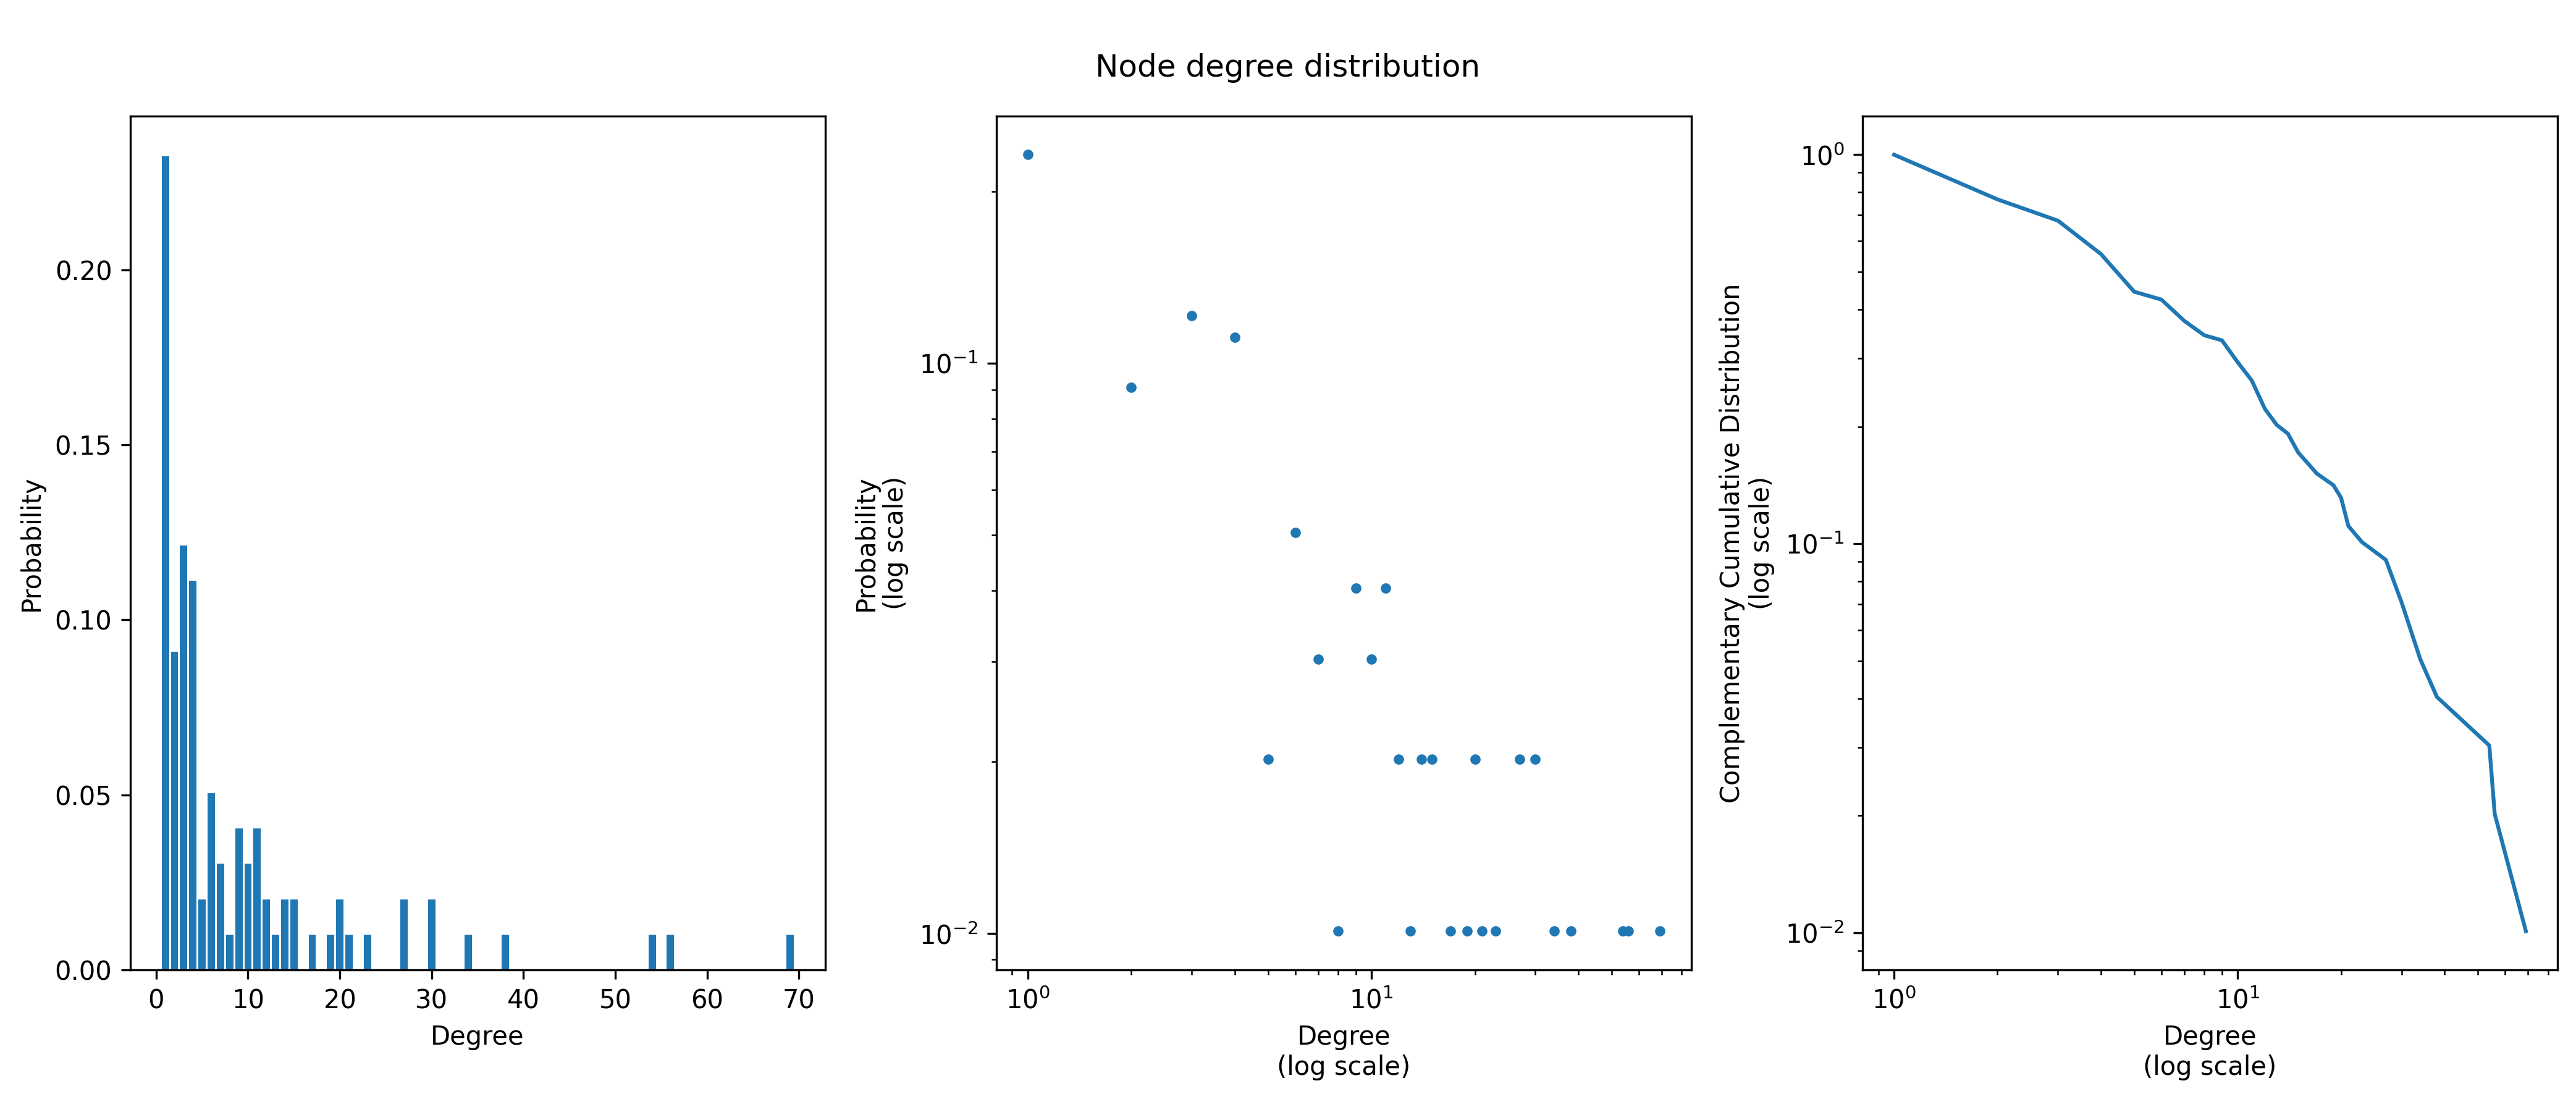

In [23]:
# Plotting the degree distribution of the bipartite filtered graph

plot_degree_distribution(filtered_inv_BG)

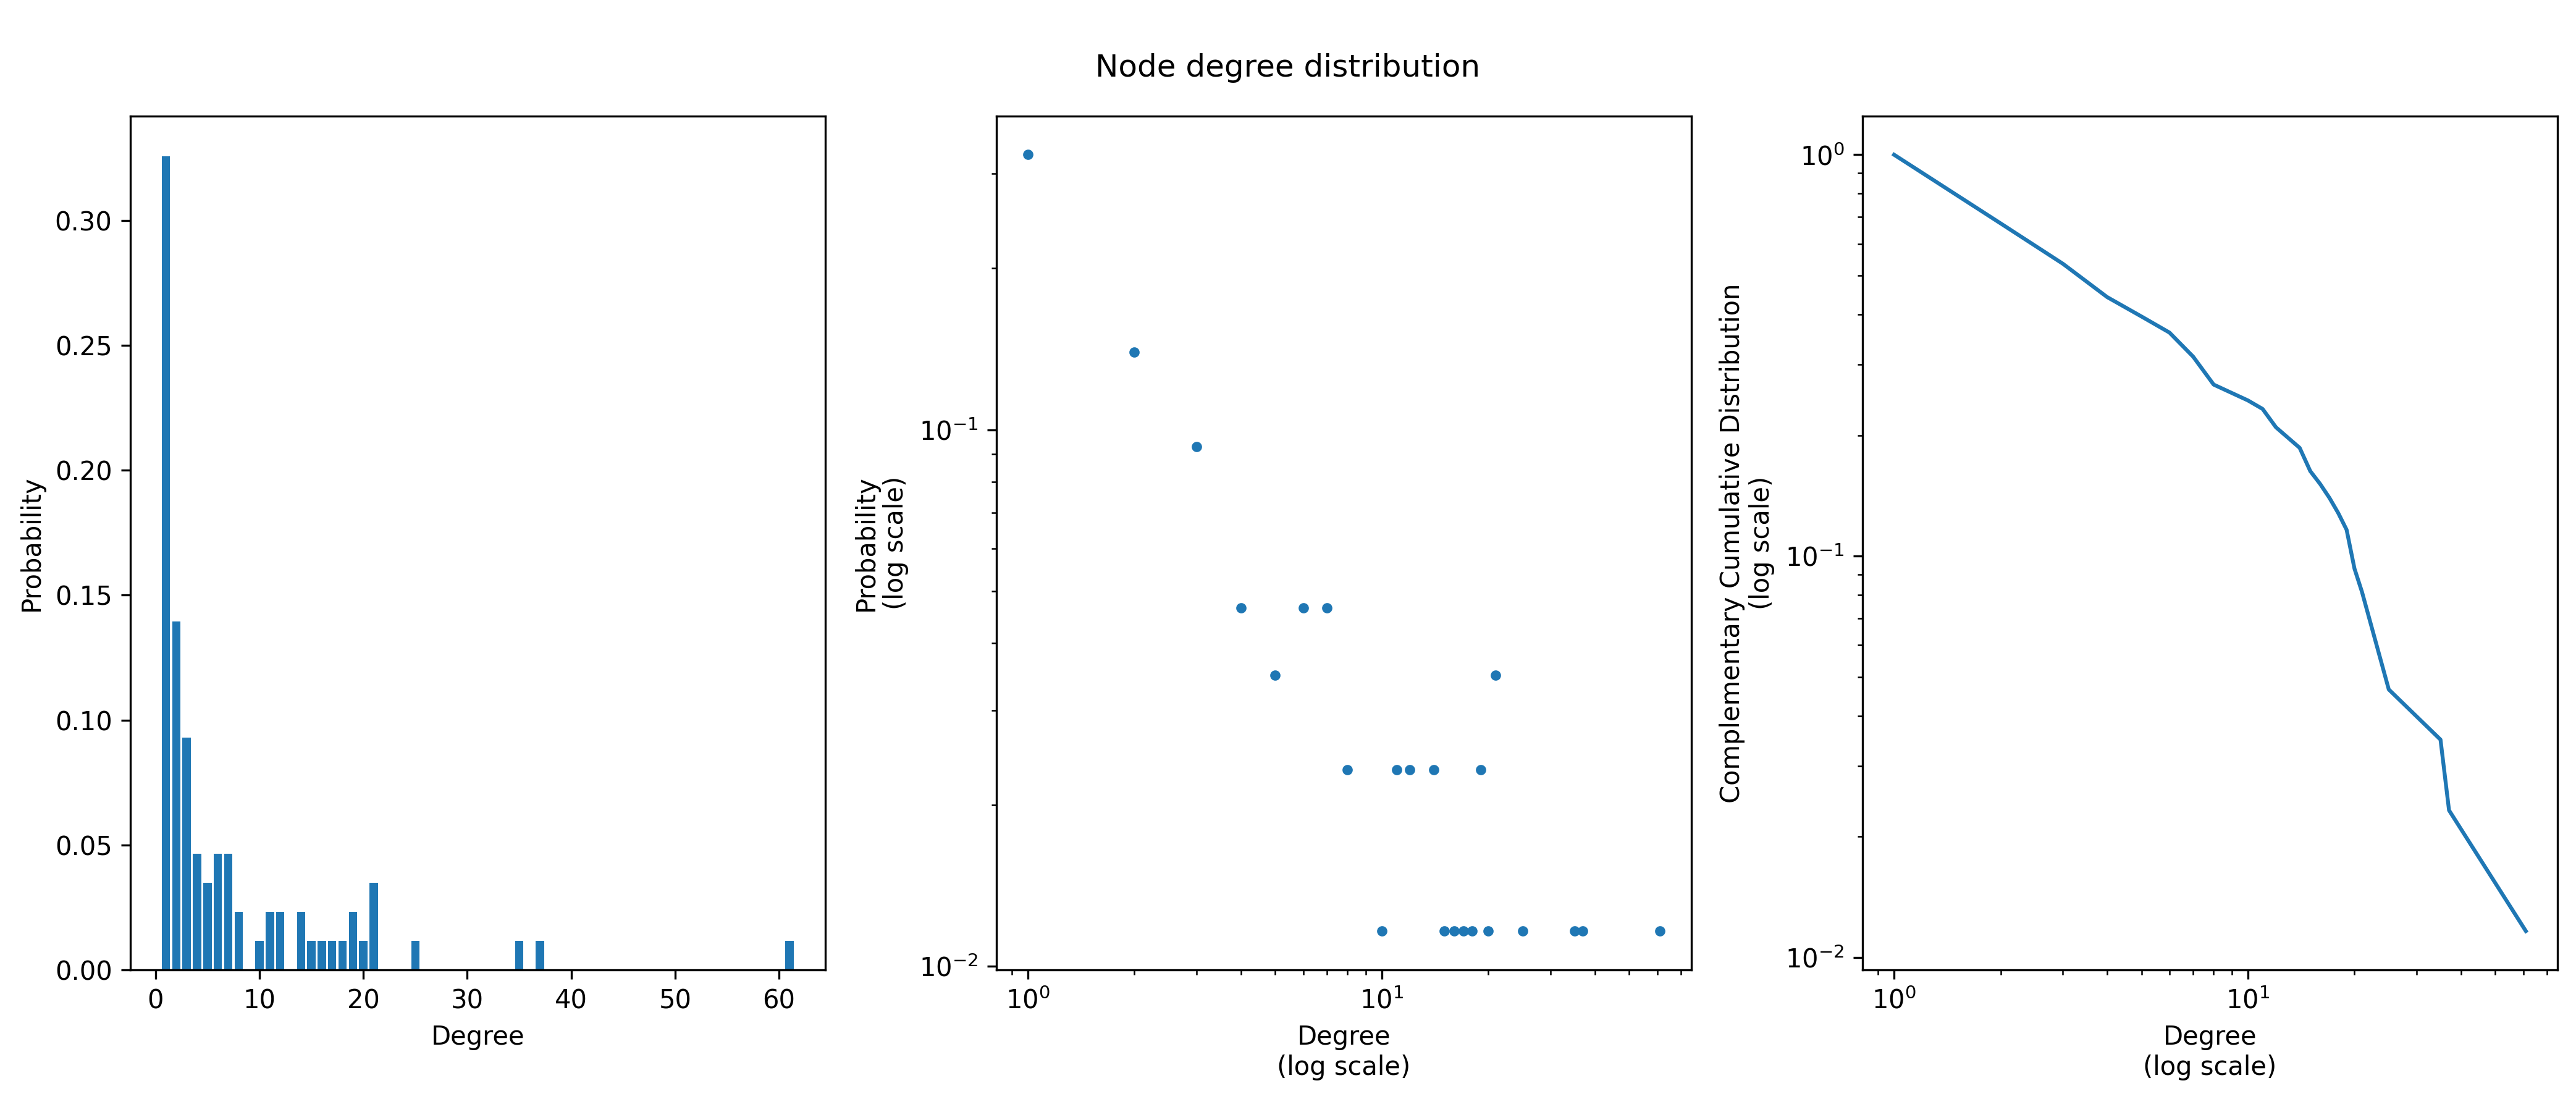

In [24]:
# Plotting the degree distribution of the bipartite filtered graph

plot_degree_distribution(filtered_ecn_BG)

Both networks portray similar result for all three subgraphs. As is expected the node degree probability diminishes as the node degree increases. 

#### Friendship Paradox

As a final piece of analysis for this section, the friendship paradox was tested for both graphs.

The code below was adapted from NS_T09_code.py.

In [25]:
def average_degree_neighbors(G, node):
    avg_degree_neighbor = 0
    node_neighbors = list(G.neighbors(node))
    if len(node_neighbors) > 0: # if the node has neighbors
        sum_degree_neighbors = 0
        for neighbor in node_neighbors:
            sum_degree_neighbors += G.degree(neighbor)
        avg_degree_neighbor = sum_degree_neighbors/len(node_neighbors)
    return avg_degree_neighbor

In [26]:
def average_degree(G):
    return mean(dict(G.degree()).values())

In [27]:
def friendship_paradox(G):
    G_degree_neighbors = {n:average_degree_neighbors(G,n) for n in G.nodes}
    avg_degree = average_degree(G)
    avg_degree_neighbors = mean([G_degree_neighbors[n] for n in G_degree_neighbors])
    return (avg_degree_neighbors > avg_degree) # If True: Friendship paradox holds

In [28]:
friendship_paradox(investing_BG)

True

In [29]:
friendship_paradox(investing_BG)

True

Both graphs show that the friendship paradox holds true.

#### (7) Using the pyvis package, you can build a visualisation of each hashtag (co-occurrence) network you created in (5). [10 points]

This section contains functions which have been taken from NS_T09_code.py and adapted or modified to the task at hand.

In [30]:
# Setting the path for saving the plotted grpahs

str_path = os.getcwd()

The function below has caused many issues in attempting to plot the graph. As a workaround a small change was actioned to the below function to allow it to work; e['weight'] changed to e['width].

In [31]:
def plot_G_pyvis(G, file_path = str_path, bln_weighted = False, bln_display_weights = False, height_px = '1000px', width_px = '1000px'):
    bln_directed = nx.is_directed(G)
    #
    nt = Network('1000px', '1000px', directed = bln_directed)
    nt.from_nx(G) # imports graph from networkx
    # nt.nodes is a list of dictionaries
    for n in nt.nodes:
        n['label'] = str(n['label'])
    #
    # nt.edges is a list of dictionaries
    if bln_weighted:
        for e in nt.edges:
            e['value'] = e['width']
        if bln_display_weights:
            for e in nt.edges:
                e['label'] = str(e['value'])
    if bln_directed and bln_weighted:
        for e in nt.edges:
            e['arrowStrikethrough'] = False
    #
    nt.toggle_physics(False) # to avoid initial slow rendering
    # to activate forceAtlas2Based and interaction options
    nt.show_buttons(filter_=['physics', 'interaction'])
    nt.show(file_path)

In [32]:
def select_largest_component(G_htag):
    """
    The function takes a bipartite graph and selects the largest connected component,
    returning a subgraph of this component.
    """
    
    print(f'Is graph connected: {nx.is_connected(G_htag)}')
    
    # Check if the graph is connected and return grpah if true
    if nx.is_connected(G_htag) == True:
        return G_htag
    
    # Else filter and return the largest component graph
    else:
        nodes_CC = list(nx.connected_components(G_htag))
        nodes_GCC = max(nodes_CC, key=len)
        GCC_htag = nx.subgraph(G_htag, nodes_GCC)
        
        print(f'Largest connected compenent no. nodes: {len(GCC_htag.nodes())}')
        print(f'Largest connected compenent no. edges: {len(GCC_htag.edges())}')
        
        return GCC_htag

In [33]:
# Selecting largest component before plotting the graph

lcc_flt_inv_BG = select_largest_component(filtered_inv_BG)

Is graph connected: True


In [34]:
# Plotting the grpah, commented out to stop graph from being overwritten

# plot_G_pyvis(lcc_flt_inv_BG, 'investing_projected.html', bln_weighted=True)

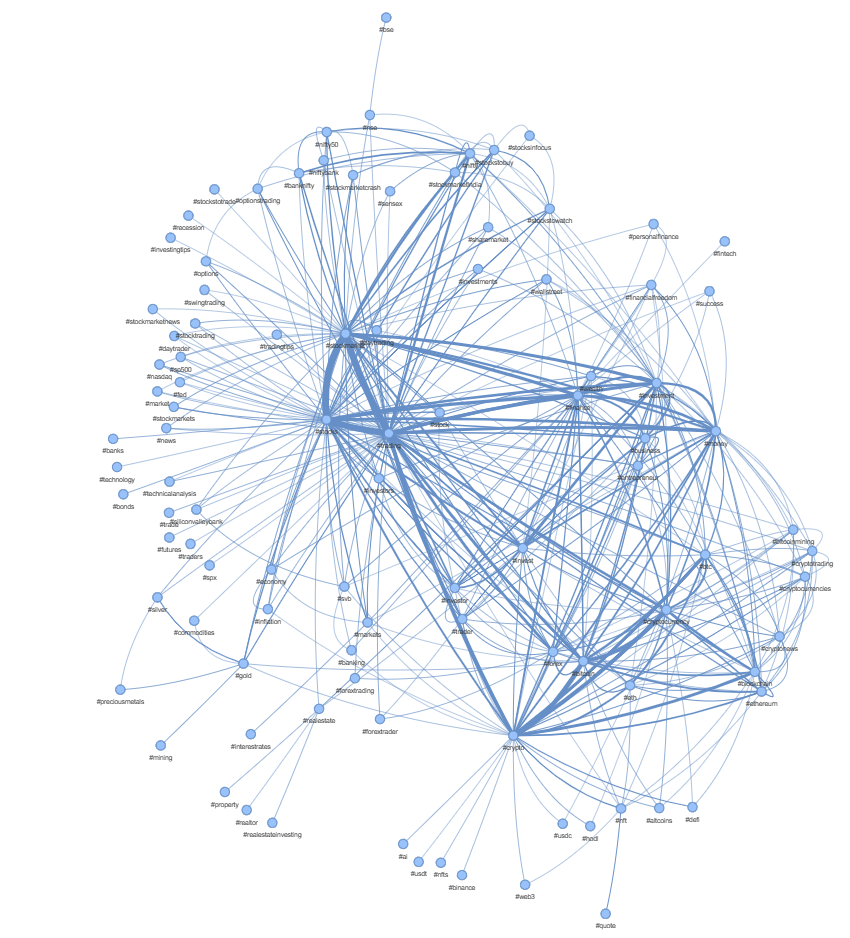

In [35]:
# Selecting largest component before plotting the graph

lcc_flt_ecn_BG = select_largest_component(filtered_ecn_BG)

Is graph connected: False
Largest connected compenent no. nodes: 84
Largest connected compenent no. edges: 301


In [36]:
# Plotting the grpah, commented out to stop graph from being overwritten

# plot_G_pyvis(lcc_flt_ecn_BG, 'economy_projected.html', bln_weighted=True)

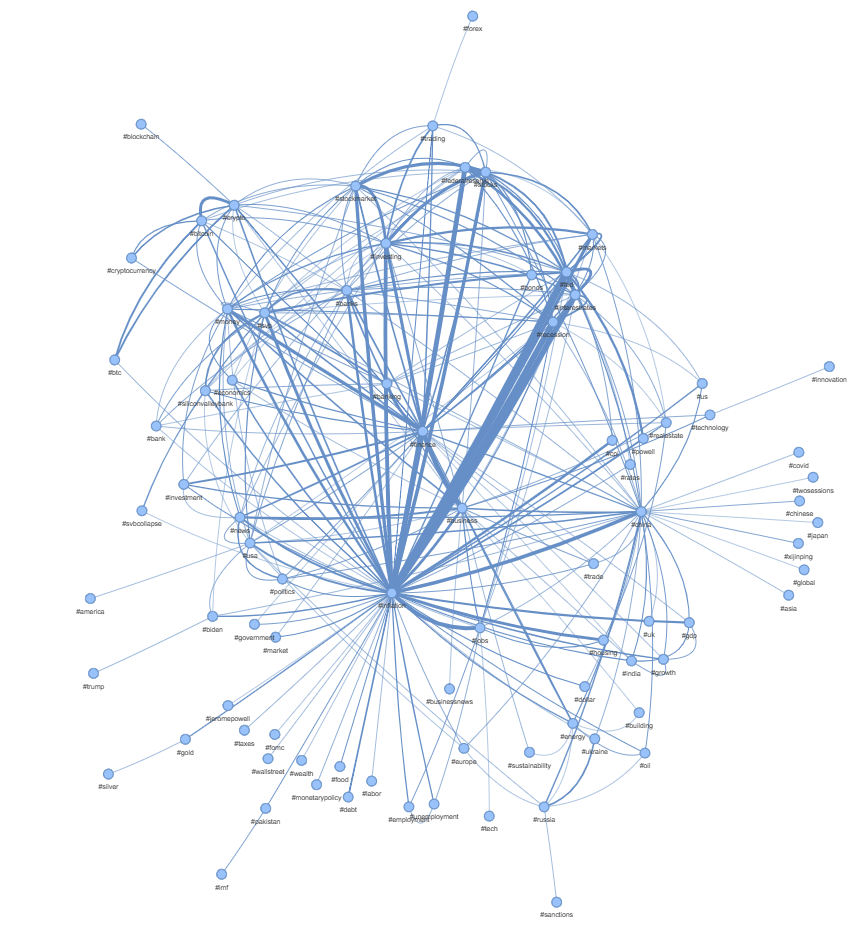

#### (8) For each network, you should identify the top n (e.g., n = 20) most central hashtags (highlighting, if there are, differences between alternative centrality metrics). Please use them – together with the visualisation in (7) – to describe what the general discussion(s) around your seed hashtag may be about. [15 points]

The code below is taken from NS_T09_code.py file provided in the lectures.

The original directed, unweighted graph is used for this analysis to be able to compute the PageRank metric.

In [37]:
def D_centrality_pd(D):
    C_in_degree = dict(D.in_degree(weight='weight'))
    C_out_degree = dict(D.out_degree(weight='weight'))
    C_close = dict(nx.closeness_centrality(D.reverse(), distance = 'weight', wf_improved=True))
    C_PR = nx.pagerank(D, weight='weight')
    #
    pd_C_in_degree = pd.DataFrame.from_dict(C_in_degree, orient='index', columns=['InDegree']).sort_index()
    pd_C_out_degree = pd.DataFrame.from_dict(C_out_degree, orient='index', columns=['OutDegree']).sort_index()
    pd_C_close = pd.DataFrame.from_dict(C_close, orient='index', columns=['Closeness']).sort_index()
    pd_C_pr = pd.DataFrame.from_dict(C_PR, orient='index', columns=['PageRank']).sort_index()
    #
    pd_C = pd.concat([pd_C_in_degree, pd_C_out_degree, pd_C_close, pd_C_pr], axis=1)
    return pd_C

In [38]:
# Creating the centrality dataframes for both network graphs

pd_investing_centrality = D_centrality_pd(investing_DG)

pd_economy_centrality = D_centrality_pd(economy_DG)

In [39]:
# Examining the most central nodes according to PageRank

pd_investing_centrality.nlargest(20,'PageRank', keep='all')

InDegree  OutDegree  Closeness  PageRank
#investing            4210          0        0.0  0.049661
#stocks                717          0        0.0  0.005193
#trading               752          0        0.0  0.004912
#stockmarket           704          0        0.0  0.004885
#crypto                577          0        0.0  0.004509
#finance               452          0        0.0  0.003013
#cryptocurrency        345          0        0.0  0.002685
#bitcoin               342          0        0.0  0.002235
#investment            368          0        0.0  0.002000
#money                 328          0        0.0  0.001942
#realestate            212          0        0.0  0.001679
#markets               156          0        0.0  0.001267
#invest                242          0        0.0  0.001214
#btc                   204          0        0.0  0.001123
#blockchain            180          0        0.0  0.001068
#gold                  149          0        0.0  0.001006
#nifty                 172          0        0.0  0.000987
#business              184          0        0.0  0.000955
#svb                   135          0        0.0  0.000924
#personalfinance       100          0        0.0  0.000923

Investigating the investing hashtag and ignoring it for the purposes of this analysis using the PageRank metric, we can see that the main points of discussion are centred around the main commodities used for investing. These include stocks, crypto, real-estate and gold. The original expectation was that crypto would find its way into the topics of conversation, as it is becoming a popular, yet loosely regulated form of investment. The crypto world is well represented in the topics of discussion as it encompasses not just Bitcoin and Ethereum as one would suspect, but crypto mining, crypto trading, crypto news, nfts, defi and web3. 

Interestingly #entrepreneur is connected to all the key forms of wealth building, from crypto, to forex to the stock market. This perhaps shows a shift in what it is regarded to be an entrepreneur at this point in time. One particularly interesting # is siliconvalleybank, which is a recent phenomenon of a major bank failing. This has been a closely related topic of discourse in combination with the stock market, trading and stocks. It is also interesting to note that the economy hashtag is a somewhat prominent topic of conversation, stemming from the trading side of the conversation spectrum.

In general the crypto currency marketplace has penetrated the investment world and is a key topic of discussion. The expected hashtags, such as stocks and trading are the centre points of discussions from which all other commodities emerge. The most surprising hashtag relates to the svb and the growing concern is economic stability, which is what will be contrasted against the second hashtag to be explored, #economy.

In general, as one would expect, the investing hashtag delves into all commodities avaliable to the public.

In [40]:
pd_investing_centrality.nlargest(20,'Closeness', keep='all')

InDegree  OutDegree  Closeness  PageRank
DirectorsTalk           0        303   0.022763  0.000059
EagleEyeReview          0        217   0.016302  0.000059
AbhipraGroup            0        166   0.012471  0.000059
YashasInfinite          0        150   0.011269  0.000059
beaker192               0        150   0.011269  0.000059
Sir_L3X                 0        141   0.010593  0.000059
SiouxCityCrypto         0        110   0.008264  0.000059
MITickWatcher           0         98   0.007362  0.000059
IKFAdvisors             0         97   0.007287  0.000059
WallStCopywrite         0         97   0.007287  0.000059
i_Know_First            0         97   0.007287  0.000059
OptionsProVol           0         96   0.007212  0.000059
Gold_prediction         0         95   0.007137  0.000059
iknowfirst              0         95   0.007137  0.000059
newsfile_corp           0         95   0.007137  0.000059
navitaxmedia            0         94   0.007062  0.000059
Slayer10Stock           0         89   0.006686  0.000059
ISABELNET_SA            0         88   0.006611  0.000059
Novus_Stock             0         78   0.005860  0.000059
fxigtrades              0         78   0.005860  0.000059

The closeness centrality measure is comprised of only users, denoted by the lack of hashtag and an outdegree greater than 0. It seems that these are news channels or mediums of investing commodity reviews, judging from their user names, such as DirectorsTalk, EagleEyeReview and Gold_prediction. It would imply that following any of these channels will expose the user to the hashtags in question for news or otherwise.

In [41]:
# Examining the most central nodes according to PageRank

pd_economy_centrality.nlargest(20,'PageRank', keep='all')

InDegree  OutDegree  Closeness  PageRank
#economy             5951          0        0.0  0.058986
#inflation            888          0        0.0  0.005770
#finance              427          0        0.0  0.002084
#china                336          0        0.0  0.001889
#recession            289          0        0.0  0.001804
#business             361          0        0.0  0.001750
#fed                  291          0        0.0  0.001709
#jobs                 236          0        0.0  0.001579
#investing            253          0        0.0  0.001383
#india                238          0        0.0  0.001373
#interestrates        223          0        0.0  0.001269
#svb                  227          0        0.0  0.001217
#markets              196          0        0.0  0.001186
#crypto               204          0        0.0  0.001130
#stockmarket          211          0        0.0  0.001056
#pakistan             151          0        0.0  0.001048
#money                214          0        0.0  0.001003
#gdp                  158          0        0.0  0.000996
#federalreserve       186          0        0.0  0.000996
#usa                  212          0        0.0  0.000963

Examining the most critical hashtags as ranked by PageRank it is clear that inflation is the most popular topic at this point in time, with good reason. From this we can ascertain how the remainder of the conversation will develop. From inflation we arrive to interest rate, closely connected to the #fed, to which both link to #recession. Needless to say the current economic outlook is pessimistic from the examination of these few hashtags alone.

The hashtag investing is revisited in this network, directly correlated to inflation. From investing crypto can be found as a prominent topic of discussion, mirroring the investing graph and its discussions. The recent banking disaster in the form of #siliconvalleybank is once again a topic of discussion, relating directly to banks, the federal reserve and interest rate. All of these aspects affect each making the topic of conversation critical to the future banking health through the management of interest rates. It is also interesting to note how gold stems directly from inflation, with only on other # stemming from it, silver. Both commodities have long been anti-inflationary which points the topic of conversation onto how best to combat the rising inflationary pressures.

Further topic of conversation stemming from inflation are jobs and housing, which are both interconnected themselves. This conversation topic revolves around the well being of the population, given that employment and unemployment are mentioned as well. Interestingly #ai stems from jobs, implying that #ai is starting to automate some of the jobs.

Other topics of conversations relate to the the various countries and groups around the world. The USA, Europe, China, India, UK, Pakistan, Russia and Ukraine are all mentioned, all of which stem from inflation. The Russia and Ukraine hashtags relate to the current war in Europe, which is additionally market by #santioncs and links directly to oil and energy hashtags. 

To summarise, the general atmosphere is ngetaive and rife with worry for jobs, housing, inflation and recession.  

In [42]:
pd_economy_centrality.nlargest(20,'Closeness', keep='all')

InDegree  OutDegree  Closeness  PageRank
NewsSurvive             0        386   0.021794  0.000044
Sion5dotcom             0        347   0.019592  0.000044
ReddySalina             0        284   0.016035  0.000044
NBTWORLDNews            0        141   0.007961  0.000044
RKrivoFX                0        133   0.007509  0.000044
ChuckDalldorf           0        128   0.007227  0.000044
GVWire                  0        127   0.007171  0.000044
PakistanLead1           0        122   0.006888  0.000044
whatsn2day              0        122   0.006888  0.000044
InvGurInd               0        119   0.006719  0.000044
Briefingcom             0        117   0.006606  0.000044
karendenetim            0        107   0.006041  0.000044
Banksnewstoday          0        105   0.005929  0.000044
AlanTonelson            0         98   0.005533  0.000044
TopFeaturedcom          0         94   0.005307  0.000044
ZSEconomy               0         92   0.005195  0.000044
iallegedly              0         91   0.005138  0.000044
SiouxCityCrypto         0         88   0.004969  0.000044
WallStCopywrite         0         87   0.004912  0.000044
4einsights              0         86   0.004856  0.000044

Examining the closeness centrality measure once again reveals that the top nodes are made up exclusively of users and prominently users whom provide news about the economy hashtag.

#### (9) For (at least) one of the networks, create a subnetwork with the nodes (and links) from largest connected component to perform a community detection exercise. Choose one community detection method amongst all those covered in the module (motivating your choice) and apply it to obtain the associated partition, partition map and community-level variables. Use the latter to describe some features of the partition (e.g., if it contains strong/weak communities). Moreover, you should build a visualisation of the subnetwork distinguishing communities by colour. Based on it – and on the community-level variables – allocate to each community a title, describe the community structure and the different discussions currently taking place. [15 points]

The code in the below functions is taken from the NS_T09_code.py file.

In [43]:
def G_community_vars(G, partition):
    pd_C_vars = None
    i_pd = 0
    for cluster_nodes in partition:
        N_c = len(cluster_nodes) # #nodes in C
        # community degree
        k_c = sum(G.degree(n) for n in cluster_nodes)
        # Use subgraph to count only internal links
        C = G.subgraph(cluster_nodes)
        L_c = len(C.edges)
        d_c_int = 0
        if N_c > 1:
            d_c_int = L_c/((N_c)*(N_c-1)/2)
        is_strong = True
        for n in cluster_nodes:
            k_i = G.degree(n)
            k_i_int = C.degree(n)
            k_i_ext = k_i - k_i_int
            # if the node does not have more neighbors in the subnetwork defined by the community than in the whole network
            if k_i_int <= k_i_ext:
                is_strong = False
                break
        is_weak = True
        k_c_int =  sum(C.degree(n) for n in cluster_nodes)
        k_c_ext = k_c - k_c_int
        # if the sum of internal degree of nodes in the subnetwork does not exceed the sum of their external degree
        if k_c_int <= k_c_ext:
            is_weak = False
        df = pd.DataFrame({'C': i_pd+1,
             'N_c': N_c,
             'L_c':L_c,
             'd_c_int': d_c_int,
             'k_c': k_c,
             'k_c_int': k_c_int,
             'k_c_ext': k_c_ext,
             'is_strong': is_strong,
             'is_weak': is_weak,
             'partition': [cluster_nodes]},
             index = [i_pd])
        i_pd += 1 # accumulate index for next iteration
        # merge community-specific results to a common dataframe
        if pd_C_vars is not None:
            pd_C_vars = pd.concat([pd_C_vars, df])
        else:
            pd_C_vars = df
    #
    return pd_C_vars

In [44]:
def G_partition_map(G, partition):
    partition_map = {}
    for idx, cluster_nodes in enumerate(partition):
        for node in cluster_nodes:
            partition_map[node] = idx + 1
    return partition_map

# Obtain a partition from a partition map
def G_partition_from_map(partition_map):
    l_partition = []
    d_part = invert_dict(partition_map)
    for c in d_part:
        l_partition.append(set(d_part[c]))
    return tuple(l_partition)

In [45]:
# Compute modularity for unweighted, undirected graphs
def G_partition_modularity(G, partition):
    L = len(G.edges)
    sum_over_Cs = 0
    for cluster_nodes in partition:
        k_c = sum(G.degree(n) for n in cluster_nodes)
        # Use subgraph to count only internal links
        C = G.subgraph(cluster_nodes)
        L_c = len(C.edges)
        sum_over_Cs += L_c - (k_c**2)/(4*L)
    #
    return sum_over_Cs/L

The majority of the below code is based on NS_T09_code.py, with a few tweaks to allow for automated best partition selection and appropriate grpah naming.

In [73]:
def community_detection(G):
    
    l_path_length = list(nx.all_pairs_shortest_path_length(G))
    N = len(G.nodes())
    
    # create empty matrix of bilateral distances
    M_dist = pd.DataFrame(np.zeros(shape=(N, N)), columns = sorted(G.nodes()), index = sorted(G.nodes()))
    for source, d_target in l_path_length:
        for target in d_target:
            M_dist.loc[source, target] = d_target[target]
            
    # turn matrix into 'condensed' vector form
    v_dist = distance.squareform(M_dist)
    
    # compute hierarchical clustering on distance matrix
    hier = hierarchy.linkage(v_dist, method='average')
    
    # plot the dendrogram
    fig, ax = plt.subplots(figsize=(8,4), dpi=400, tight_layout=True)
    hierarchy.dendrogram(hier, labels=sorted(G.nodes()))
    plt.title('Hierarchical Agglomerative Clustering')

    # Cut the dendrogram at a specific distance and allocate nodes into clusters
    assignments = hierarchy.fcluster(hier, t = 2.5, criterion='distance')
    
    # Obtain the partition map from the assignments to clusters
    HC_part_map_pl = {sorted(G.nodes())[i]:assignments[i] for i in range(0, len(assignments))}
    
    # Obtain the partition from the partition map
    part_HC_pl = G_partition_from_map(HC_part_map_pl)
    G_community_vars(G, part_HC_pl).iloc[:,:-1]
    
    # Hierarchical Agglomerative Clustering
    # based on Jaccard dissimilarity
    # Create tuple with all node pairs
    G_node_tuples = [(source, target) for source in G.nodes() for target in G.nodes()]
    # Compute shortest Jaccard similarity between each node pair
    l_jaccard_sim = list(nx.jaccard_coefficient(G, ebunch = G_node_tuples))

    N = len(G.nodes())
    M_dist = pd.DataFrame(np.zeros(shape=(N, N)), columns = sorted(G.nodes()), index = sorted(G.nodes()))
    for source, target, jaccard in l_jaccard_sim:
        # dissimilarity = 1 - similarity
        M_dist.loc[source, target] = 1 - jaccard
    # turn matrix into 'condensed' vector form
    v_dist = distance.squareform(M_dist)
    # compute hierarchical clustering on distance matrix
    hier = hierarchy.linkage(v_dist, method='average')
    # plot the dendrogram
    fig, ax = plt.subplots(figsize=(8,4), dpi=400, tight_layout=True)
    hierarchy.dendrogram(hier, labels=sorted(G.nodes()))
    plt.title('Hierarchical Agglomerative Clustering with Jaccard')
    #
    # Cut the dendrogram at a specific distance and allocate nodes into clusters
    assignments = hierarchy.fcluster(hier, t = 0.95, criterion='distance')
    # Obtain the partition map from the assignments to clusters
    HC_part_map_jaccard = {sorted(G.nodes())[i]:assignments[i] for i in range(0, len(assignments))}
    # Obtain the partition from the partition map
    part_HC_jaccard = G_partition_from_map(HC_part_map_jaccard)

    G_community_vars(G, part_HC_jaccard).iloc[:,:-1]
    #
    # Kernighan-Lin bisection
    # https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.kernighan_lin.kernighan_lin_bisection.html
    part_KL_bisect = nx.community.kernighan_lin_bisection(G, weight='weight')
    G_partition_map(G, part_KL_bisect)
    G_community_vars(G, part_KL_bisect).iloc[:,:-1]
    #
    # Girvan–Newman algorithm returns a partition sequence from bisection to a trivial partition containing N communities with one element each
    # https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html
    part_seq_GN = list(nx.community.girvan_newman(G))

    len(part_seq_GN[0]) # bisection
    len(part_seq_GN[len(G.nodes)-2]) # trivial partition
    #
    modularity_sequence = {part_seq_GN.index(p):nx.community.quality.modularity(G, p, weight = 'weight') for p in part_seq_GN}
    #
    part_GN_max_Q = part_seq_GN[max(modularity_sequence, key=modularity_sequence.get)]
    G_partition_map(G, part_GN_max_Q)
    G_community_vars(G, part_GN_max_Q).iloc[:,:-1]
    #
    # Clauset-Newman-Moore greedy modularity maximisation
    # https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html
    part_CNM_modmax = nx.community.greedy_modularity_communities(G, weight='weight')

    G_partition_map(G, part_CNM_modmax)
    G_community_vars(G, part_CNM_modmax).iloc[:,:-1]
    #
    # Louvain greedy modularity maximisation
    # https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html
    part_L_modmax = nx.community.louvain_communities(G, weight='weight')
    G_partition_map(G, part_L_modmax)
    G_community_vars(G, part_L_modmax).iloc[:,:-1]
    #
    # Label propagation algorithm
    # https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.label_propagation.label_propagation_communities.html
    part_Lab_Prop = list(nx.community.label_propagation_communities(G))
    G_partition_map(G, part_Lab_Prop)
    G_community_vars(G, part_Lab_Prop).iloc[:,:-1]
    
    pd_col_HC_pl = pd.DataFrame.from_dict(HC_part_map_pl, orient='index', columns=['HC_plength']).sort_index()
    pd_col_HC_jaccard = pd.DataFrame.from_dict(HC_part_map_jaccard, orient='index', columns=['HC_jaccard']).sort_index()
    pd_col_KL_bisect = pd.DataFrame.from_dict(G_partition_map(G, part_KL_bisect), orient='index', columns=['KL_bisect']).sort_index()
    pd_col_GN_bridge = pd.DataFrame.from_dict(G_partition_map(G, part_GN_max_Q), orient='index', columns=['GN_bridge']).sort_index()
    pd_col_CNM_modmax = pd.DataFrame.from_dict(G_partition_map(G, part_CNM_modmax), orient='index', columns=['CNM_modmax']).sort_index()
    pd_col_L_modmax = pd.DataFrame.from_dict(G_partition_map(G, part_L_modmax), orient='index', columns=['L_modmax']).sort_index()
    pd_col_Lab_Prop = pd.DataFrame.from_dict(G_partition_map(G, part_Lab_Prop), orient='index', columns=['Lab_Prop']).sort_index()
    #
    pd_C = pd.concat([pd_col_HC_pl, pd_col_HC_jaccard, pd_col_KL_bisect, pd_col_GN_bridge, pd_col_CNM_modmax, pd_col_L_modmax, pd_col_Lab_Prop], axis=1)
    
    ncol_nrow = len(list(pd_C.columns))
    pd_MNIs = pd.DataFrame(np.zeros(shape=(ncol_nrow,ncol_nrow)), columns = list(pd_C.columns), index = list(pd_C.columns))
    #
    # iterate to fill pd_MNIs
    for i in range(0,len(pd_MNIs)):
        for j in range(0,len(pd_MNIs)):
            method_i = list(pd_MNIs.columns)[i]
            method_j = list(pd_MNIs.columns)[j]
            if i<j:
                continue
            pd_MNIs.loc[method_i, method_j] = normalized_mutual_info_score(pd_C[method_i],pd_C[method_j])
    
    l_part_by_method = [part_HC_pl, part_HC_jaccard, part_KL_bisect,  part_GN_max_Q, part_CNM_modmax, part_L_modmax, part_Lab_Prop]
    
    # create a dictionary with the method as key and the modularity score achieved by the method as value
    Q_by_method = {list(pd_MNIs.columns)[i]: nx.community.quality.modularity(G, l_part_by_method[i], weight = 'weight') for i in range(0,len(pd_MNIs))}
    
    # Using index to keep track of which partition is best
    index = list(Q_by_method).index(max(Q_by_method, key=Q_by_method.get))

    # Selecting best partition
    best_partition = G_partition_map(G, l_part_by_method[index])
    
    # select one method to group nodes in order to plot the communities
    G_plot = G.copy()
    for n in G_plot.nodes():
        G_plot.nodes[n]['group'] = int(pd_C.loc[n, list(Q_by_method.keys())[index]])
    for e in G_plot.edges():
        if best_partition[e[0]]!=best_partition[e[1]]:
            G_plot.edges[e]['color'] = '#bdbdbd'

    plot_G_pyvis(G_plot, 'Twitter_Hashtag_Network_' + G.name + max(Q_by_method, key=Q_by_method.get) + '.html', bln_weighted = True)
    
    print(f'Community detection method chosen: {list(Q_by_method.keys())[index]}')
    
    # Return the cummunity variables for analysis
    return G_community_vars(G, l_part_by_method[index]).iloc[:,:-1]


In [82]:
# Creating a graph copy
G_investing = lcc_flt_inv_BG.copy()

# Naming the graph so for convenient saving to local drive
G_investing.name = 'investing_'

Community detection method chosen: CNM_modmax


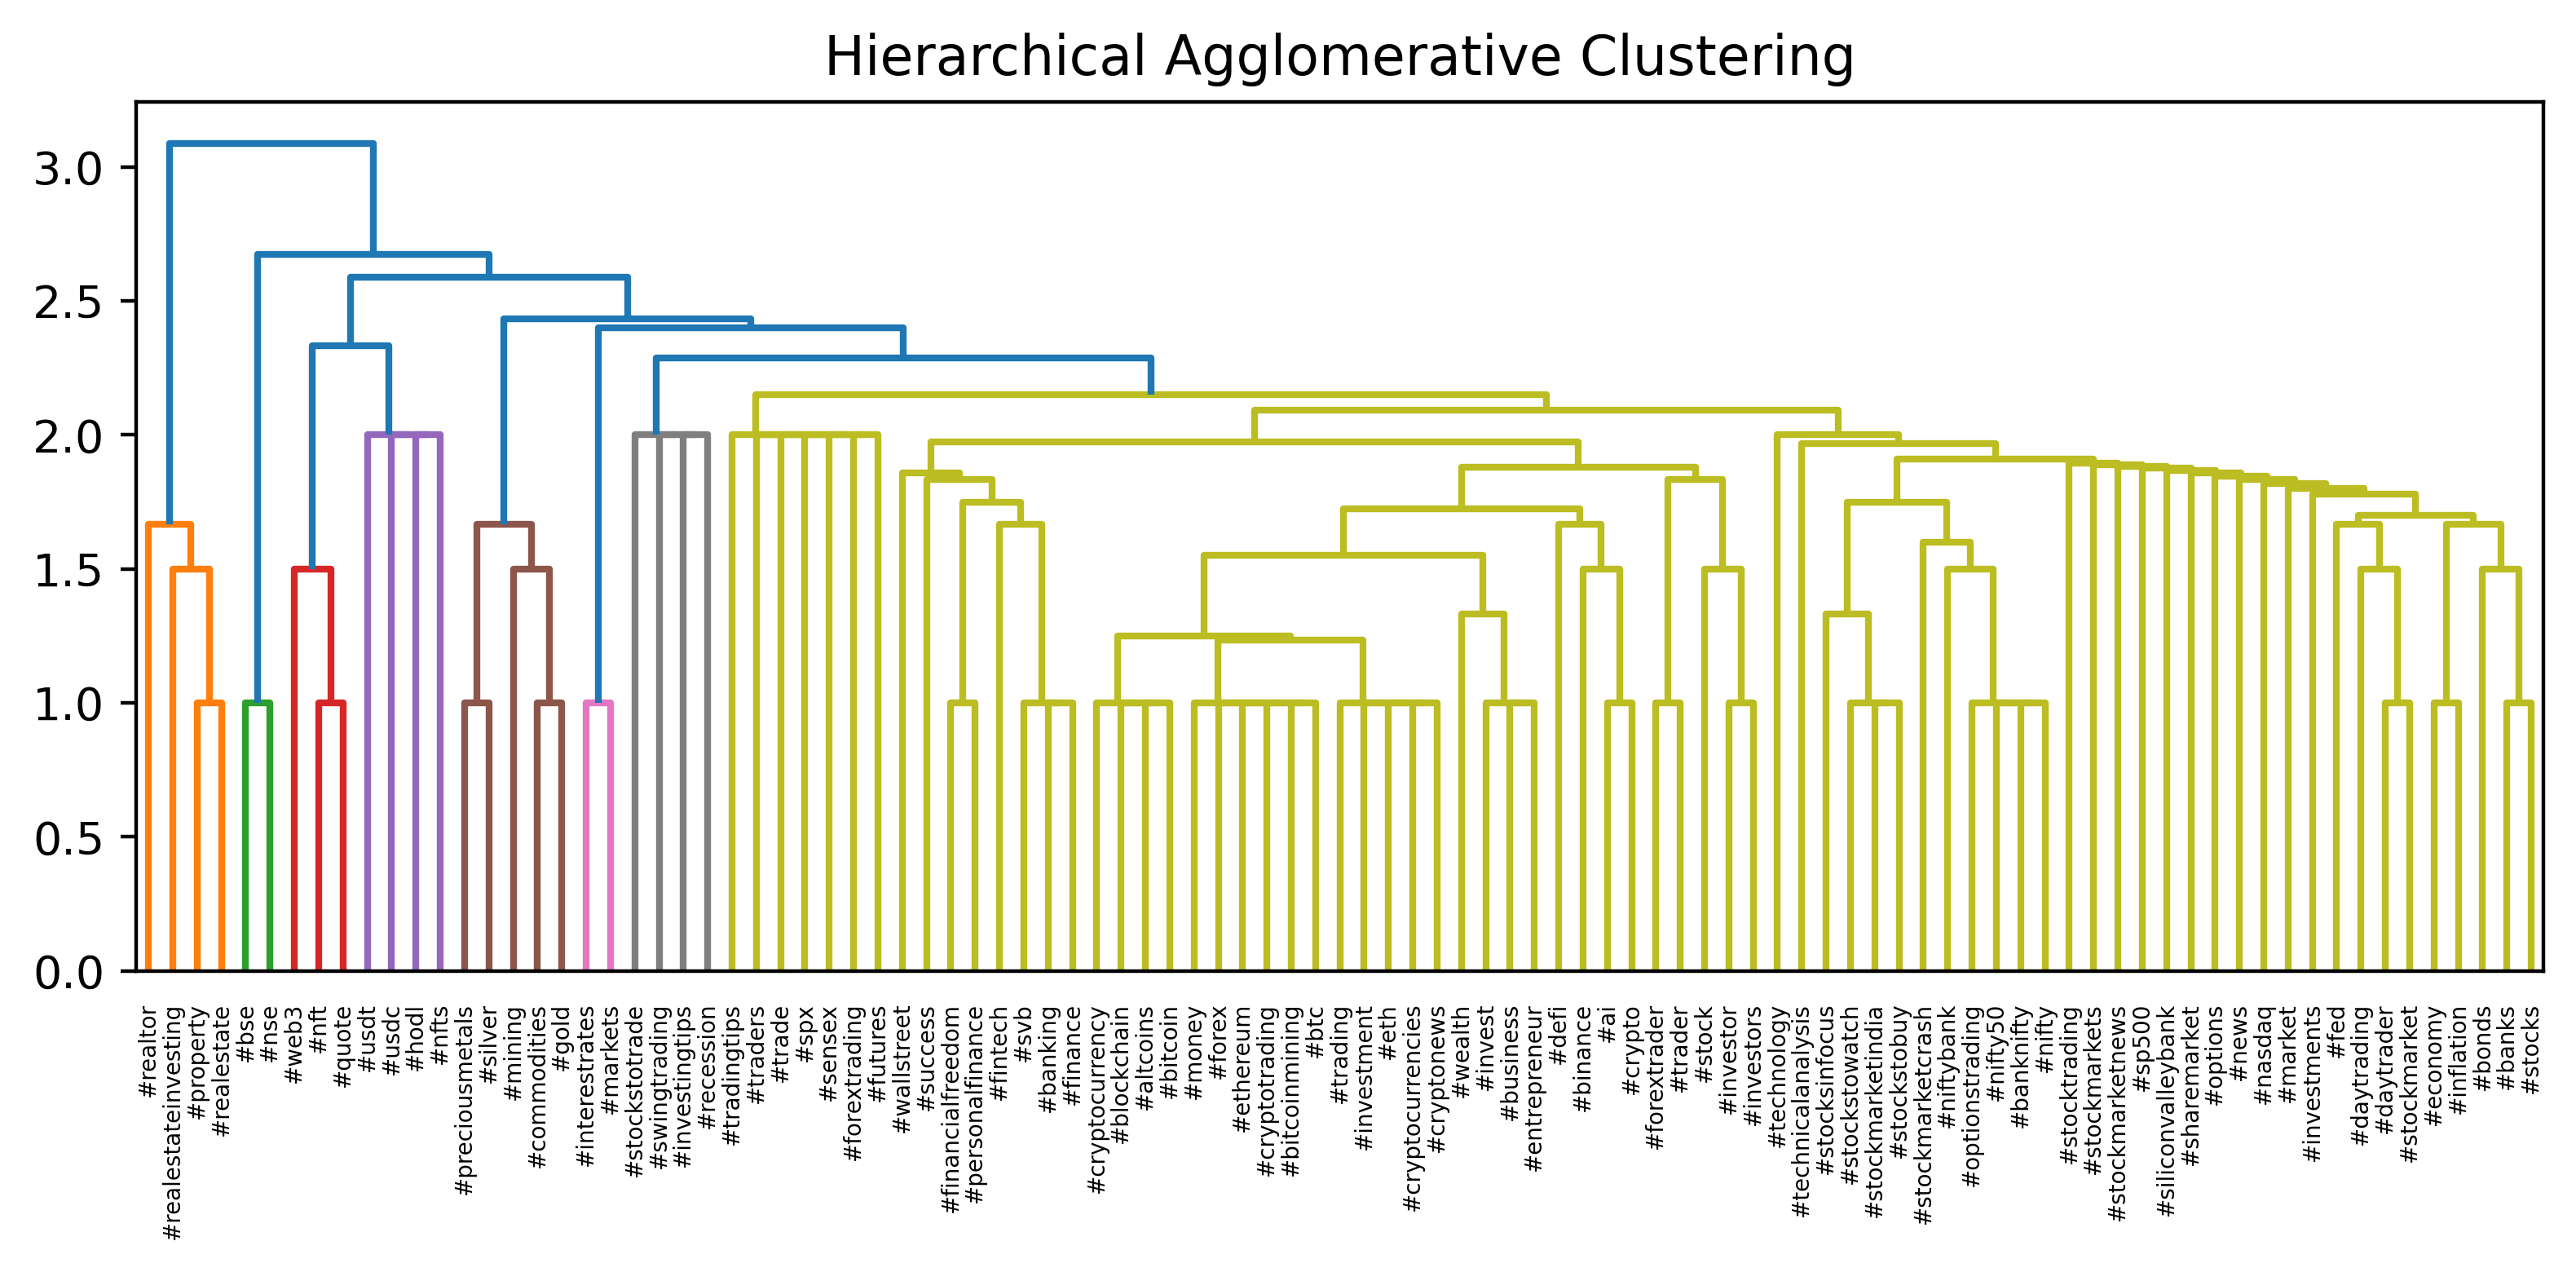

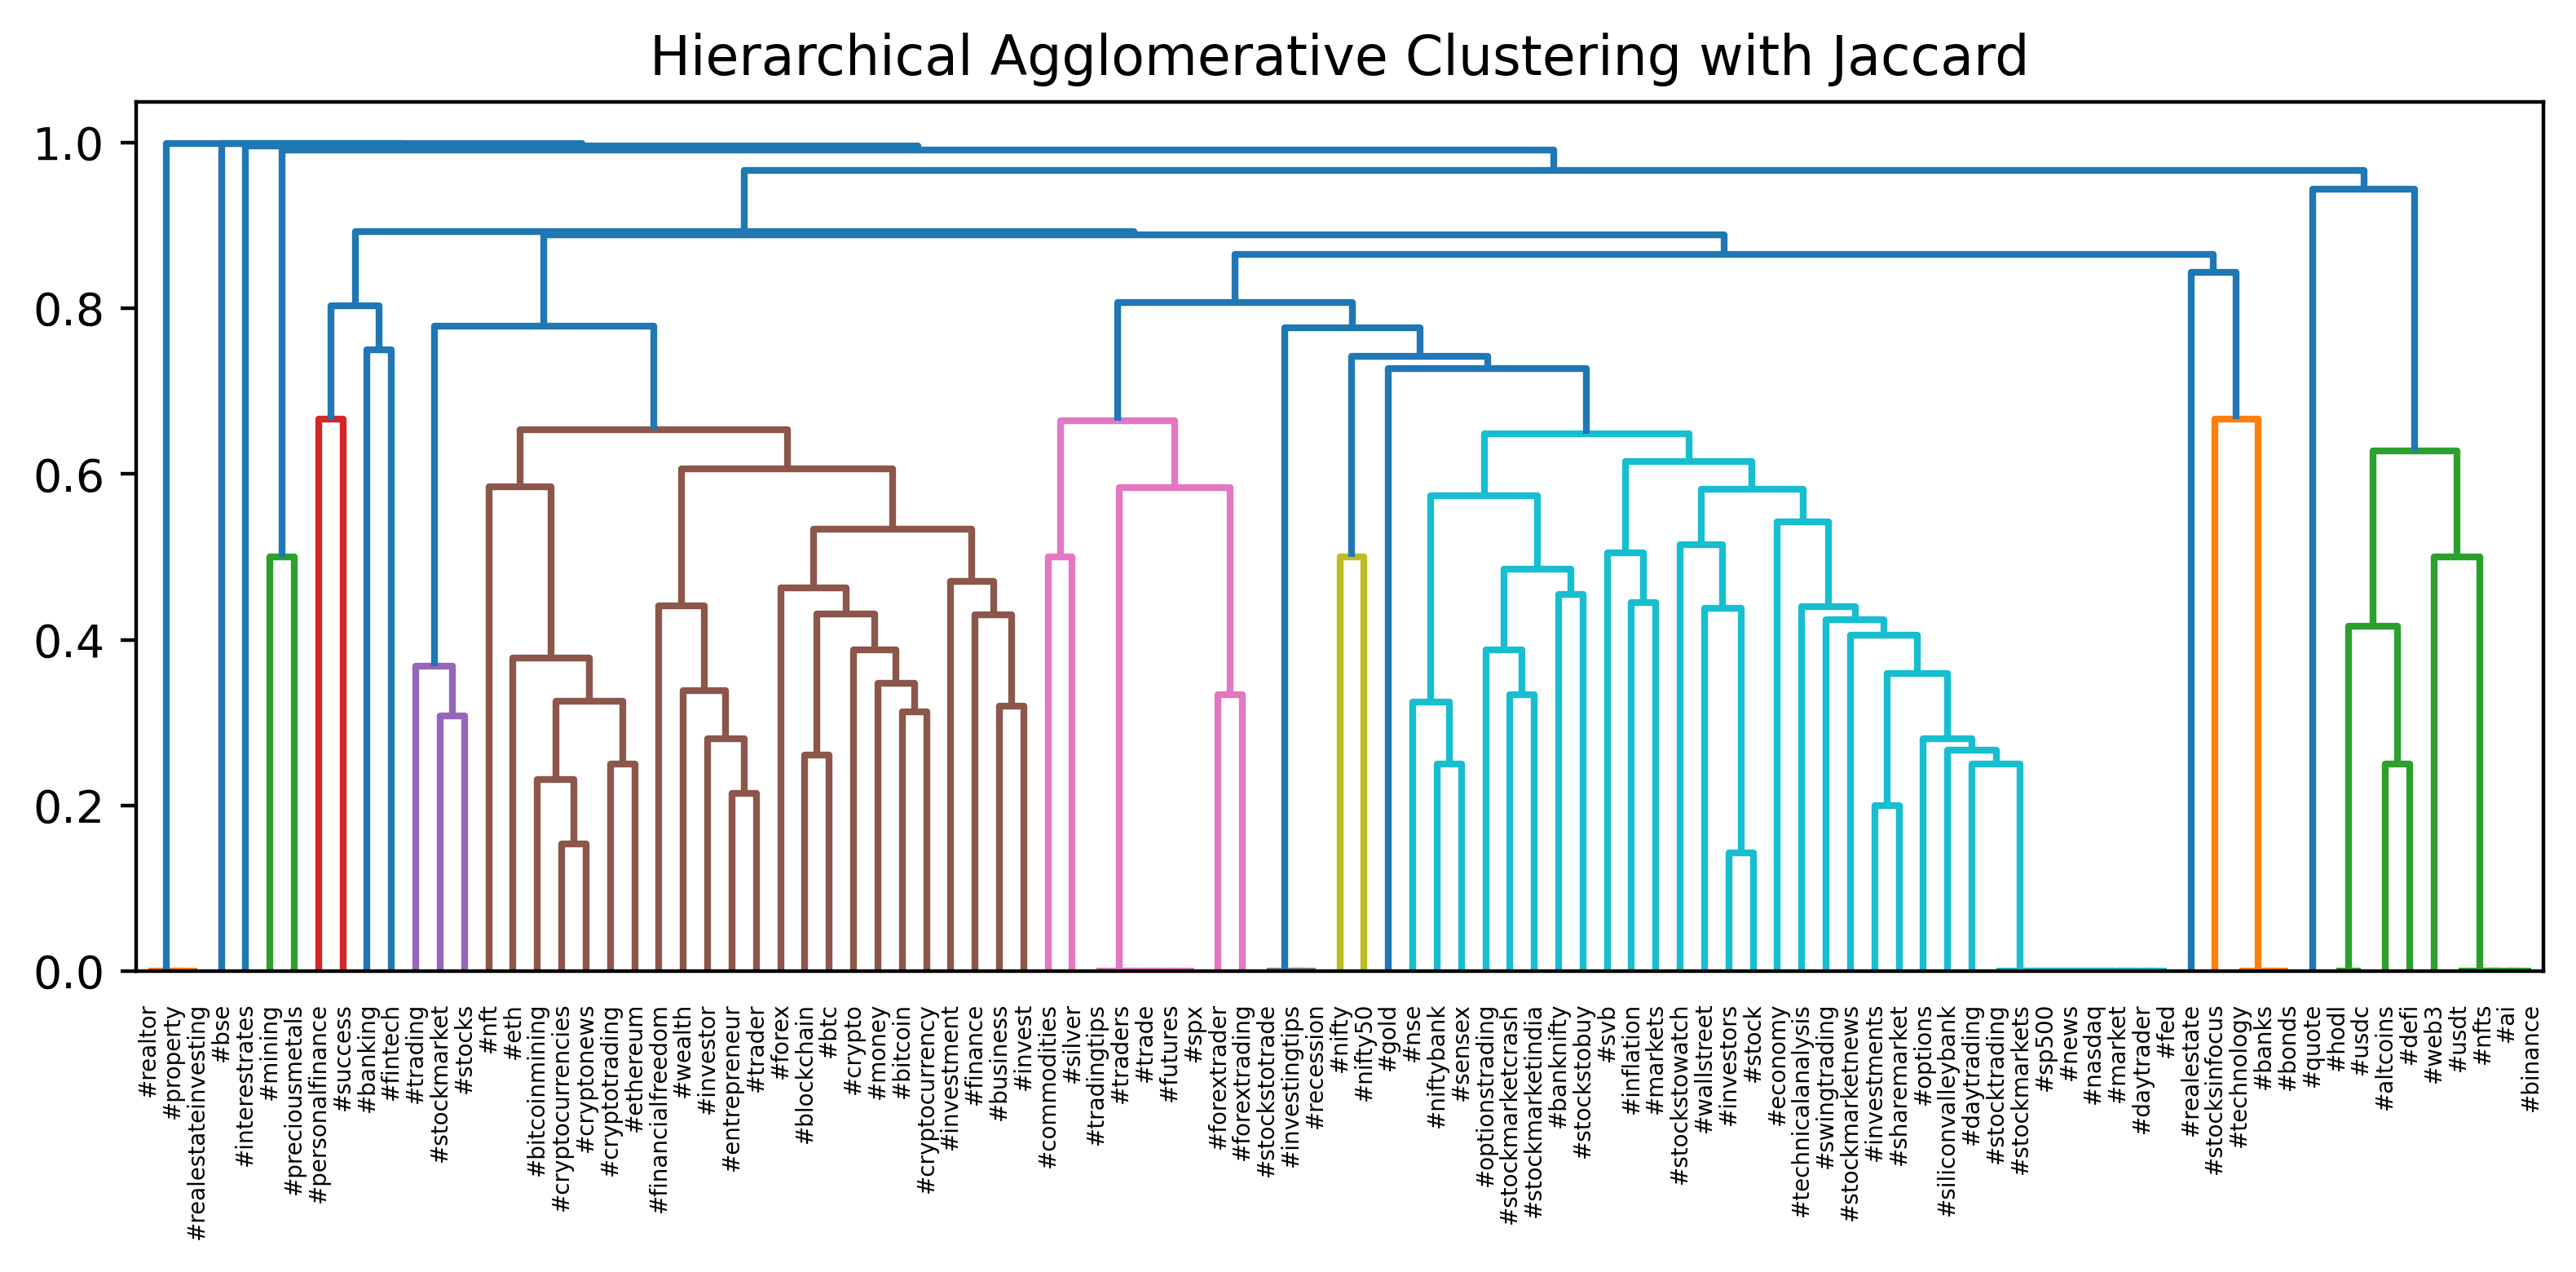

In [88]:
# Running the community detection function

G_investing_cummunity_var = community_detection(G_investing)

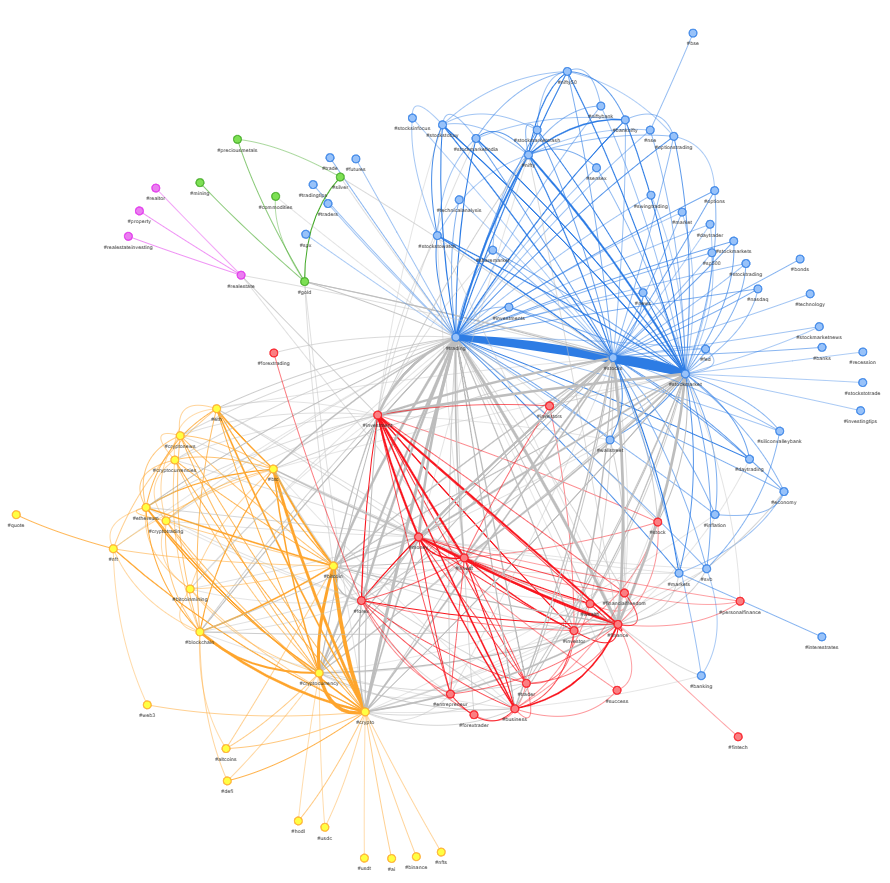

In [94]:
# Inspecting the community variables

G_investing_cummunity_var

C  N_c  L_c   d_c_int  k_c  k_c_int  k_c_ext  is_strong  is_weak
0  1   50  138  0.112653  371      276       95      False     True
1  2   22   75  0.324675  236      150       86      False     True
2  3   18   62  0.405229  246      124      122      False     True
3  4    5    5  0.500000   18       10        8      False     True
4  5    4    3  0.500000    9        6        3      False     True

The community allocation and partition generally changes slightly with each iteration. With that said the existing community variables and visualisation will be examined for each hashtag.

In the investing hashtag, which uses the CNM_modmax partition, results in five weak communities being formed. Community three is the closest to loosing its ‘weak’ status, given that its internal links almost equals the external links. It is also interesting to note how the community density increases as the number of nodes in the community decreases.

The first and largest community is most difficult to title, due to the many conversations taking place at the same time. The title chosen for this community is ‘Trading’ as this will encompass most conversation topics. There are three main nodes within this community, ‘trading’, ‘stocks’ and ‘stockmarket’. The conversation within this community pertains to all things trading, from investment talk, to which stock to buy, daytrading, options trading etc.. This conversation topic also covers come more obscure topics, such as investment tips, inflation, silliconvalleybank and recession, although these are fringe points.

The second community appropriate title is ‘Crypto’. The expected topics of conversation may be found here, from bitcoin, Ethereum and altcoins to defi, nft and web3. 

The third community relates to investments and forex trading and would aptly be titled as ‘Investment’. This community is less cohesive in its conversation topic, due to iterations of the word invest appearing frequently. The conversation revolves around how to become a better trader, wealth building, success, entrepreneurship and forex trading. 

The final two communities are easily titled based on their narrow conversational topics. The fourth community relates to commodity investing, gold, silver and precious metals and would aptly be called ‘Precious Metals’. 

The final community would be titled ‘Real Estate’, due to its specific conversation topic on real-estate and real-estate investing.

With the exploration of the investing hashtag community complete, the economy hashtag communities will be explored.

In [90]:
# Creating a graph copy
G_economy = lcc_flt_ecn_BG.copy()

# Naming the graph so for convenient saving to local drive
G_economy.name = 'economy_'

Community detection method chosen: L_modmax


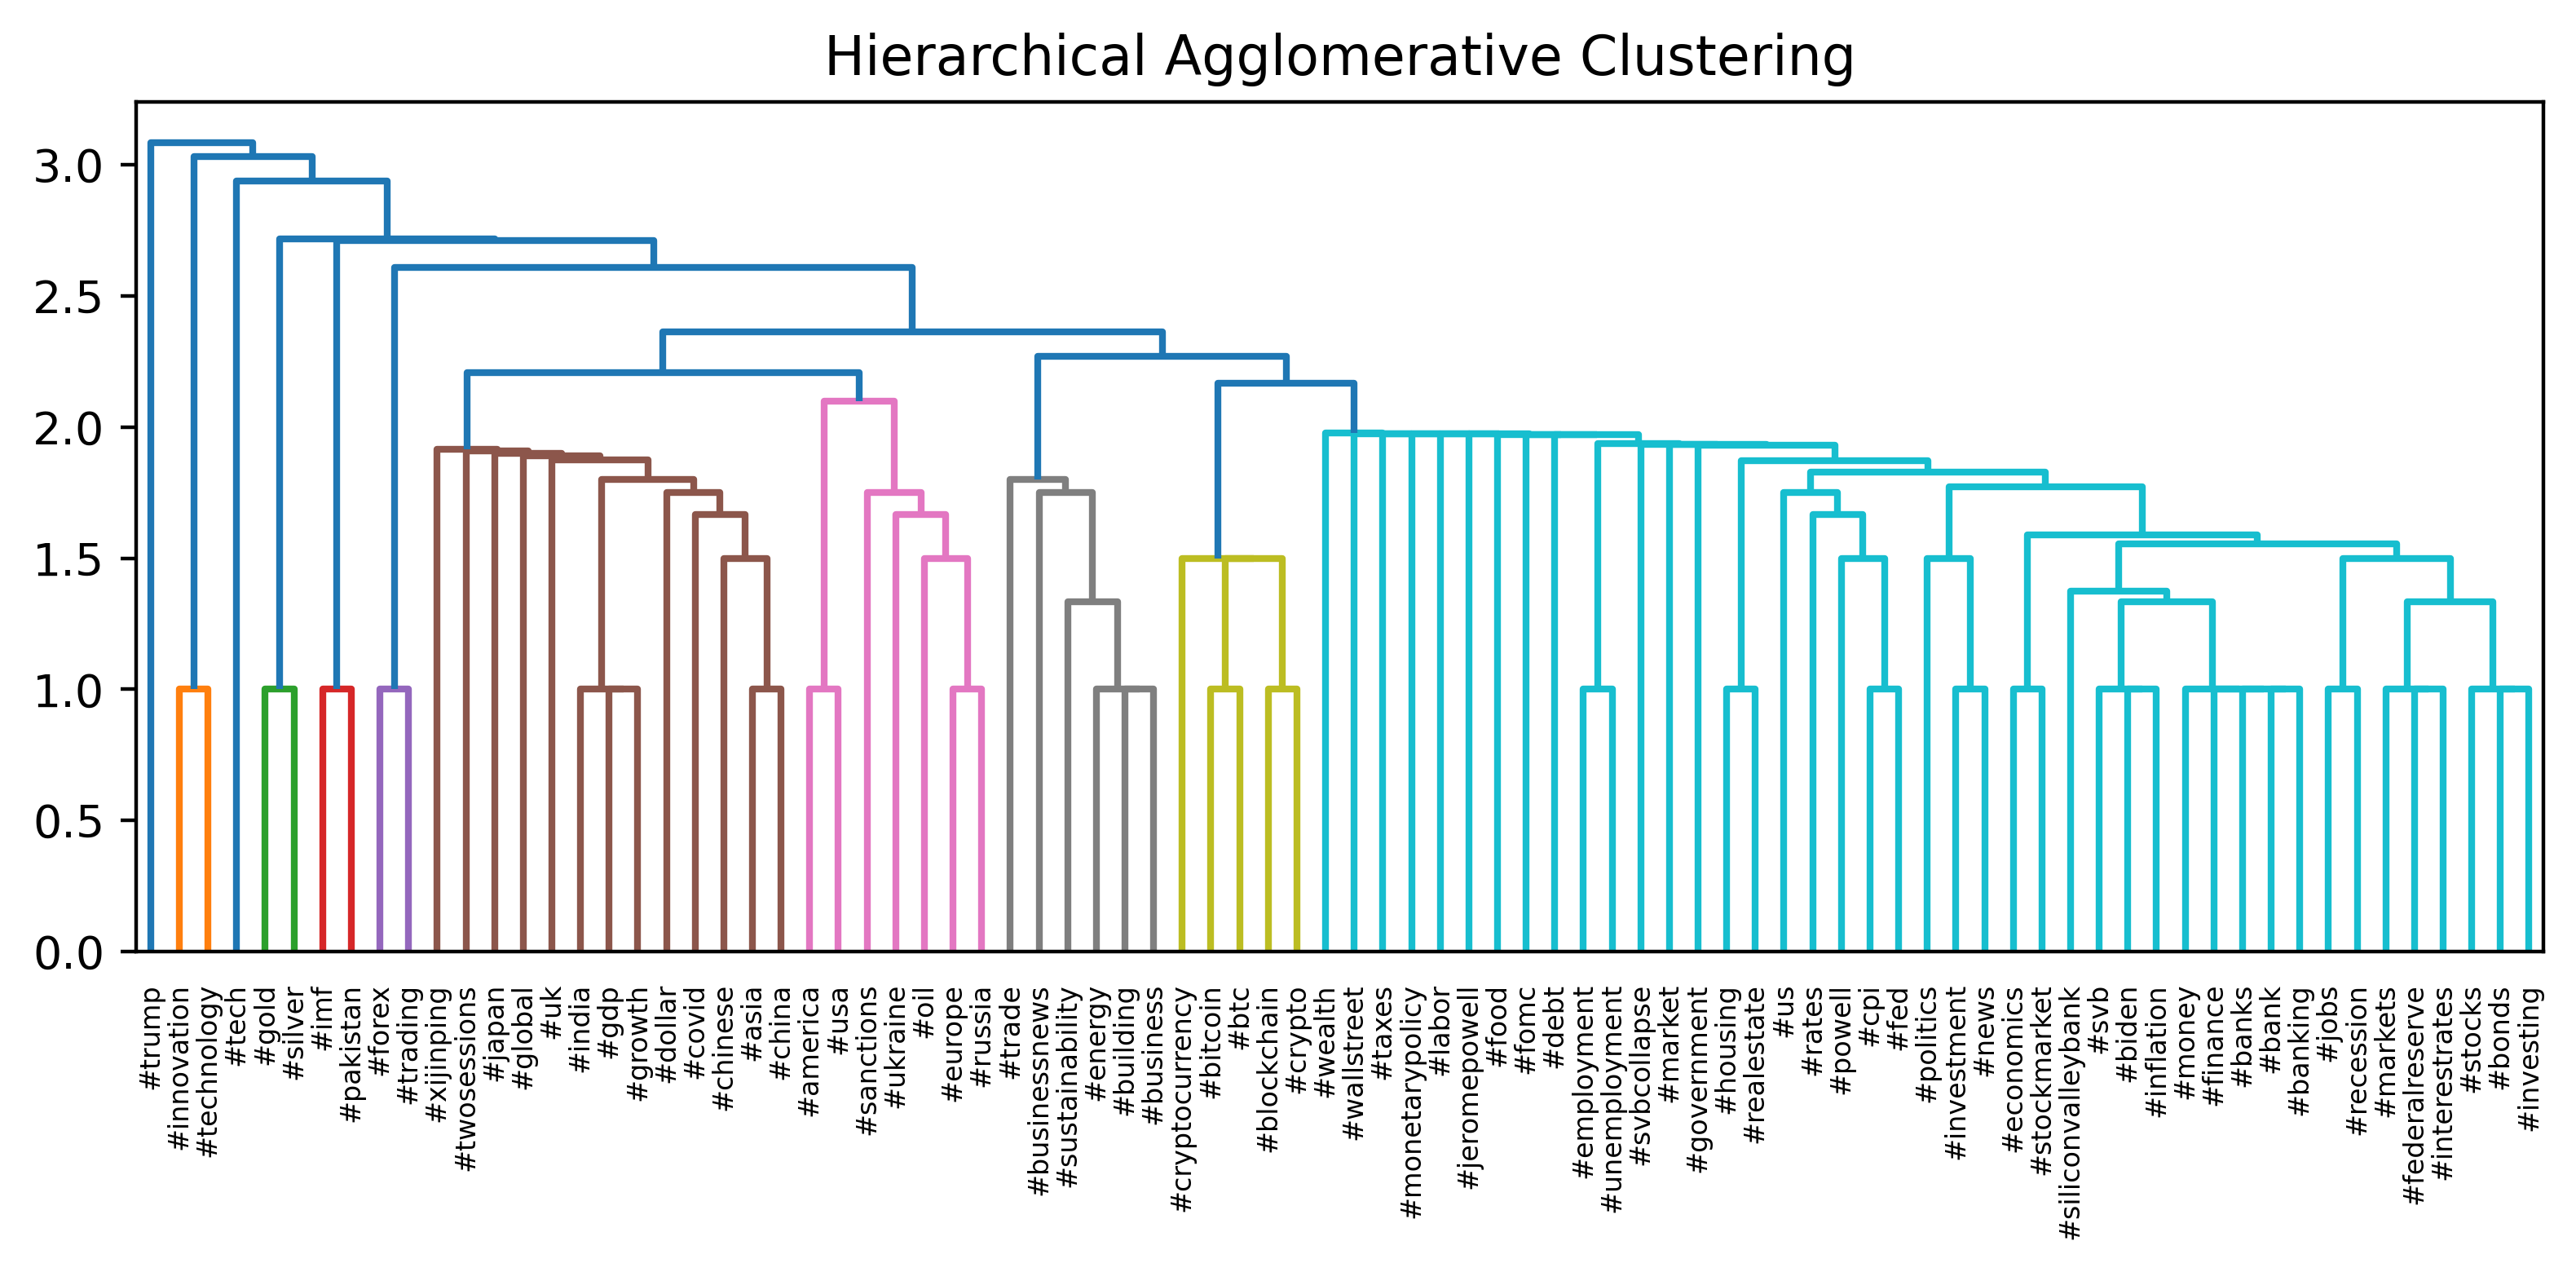

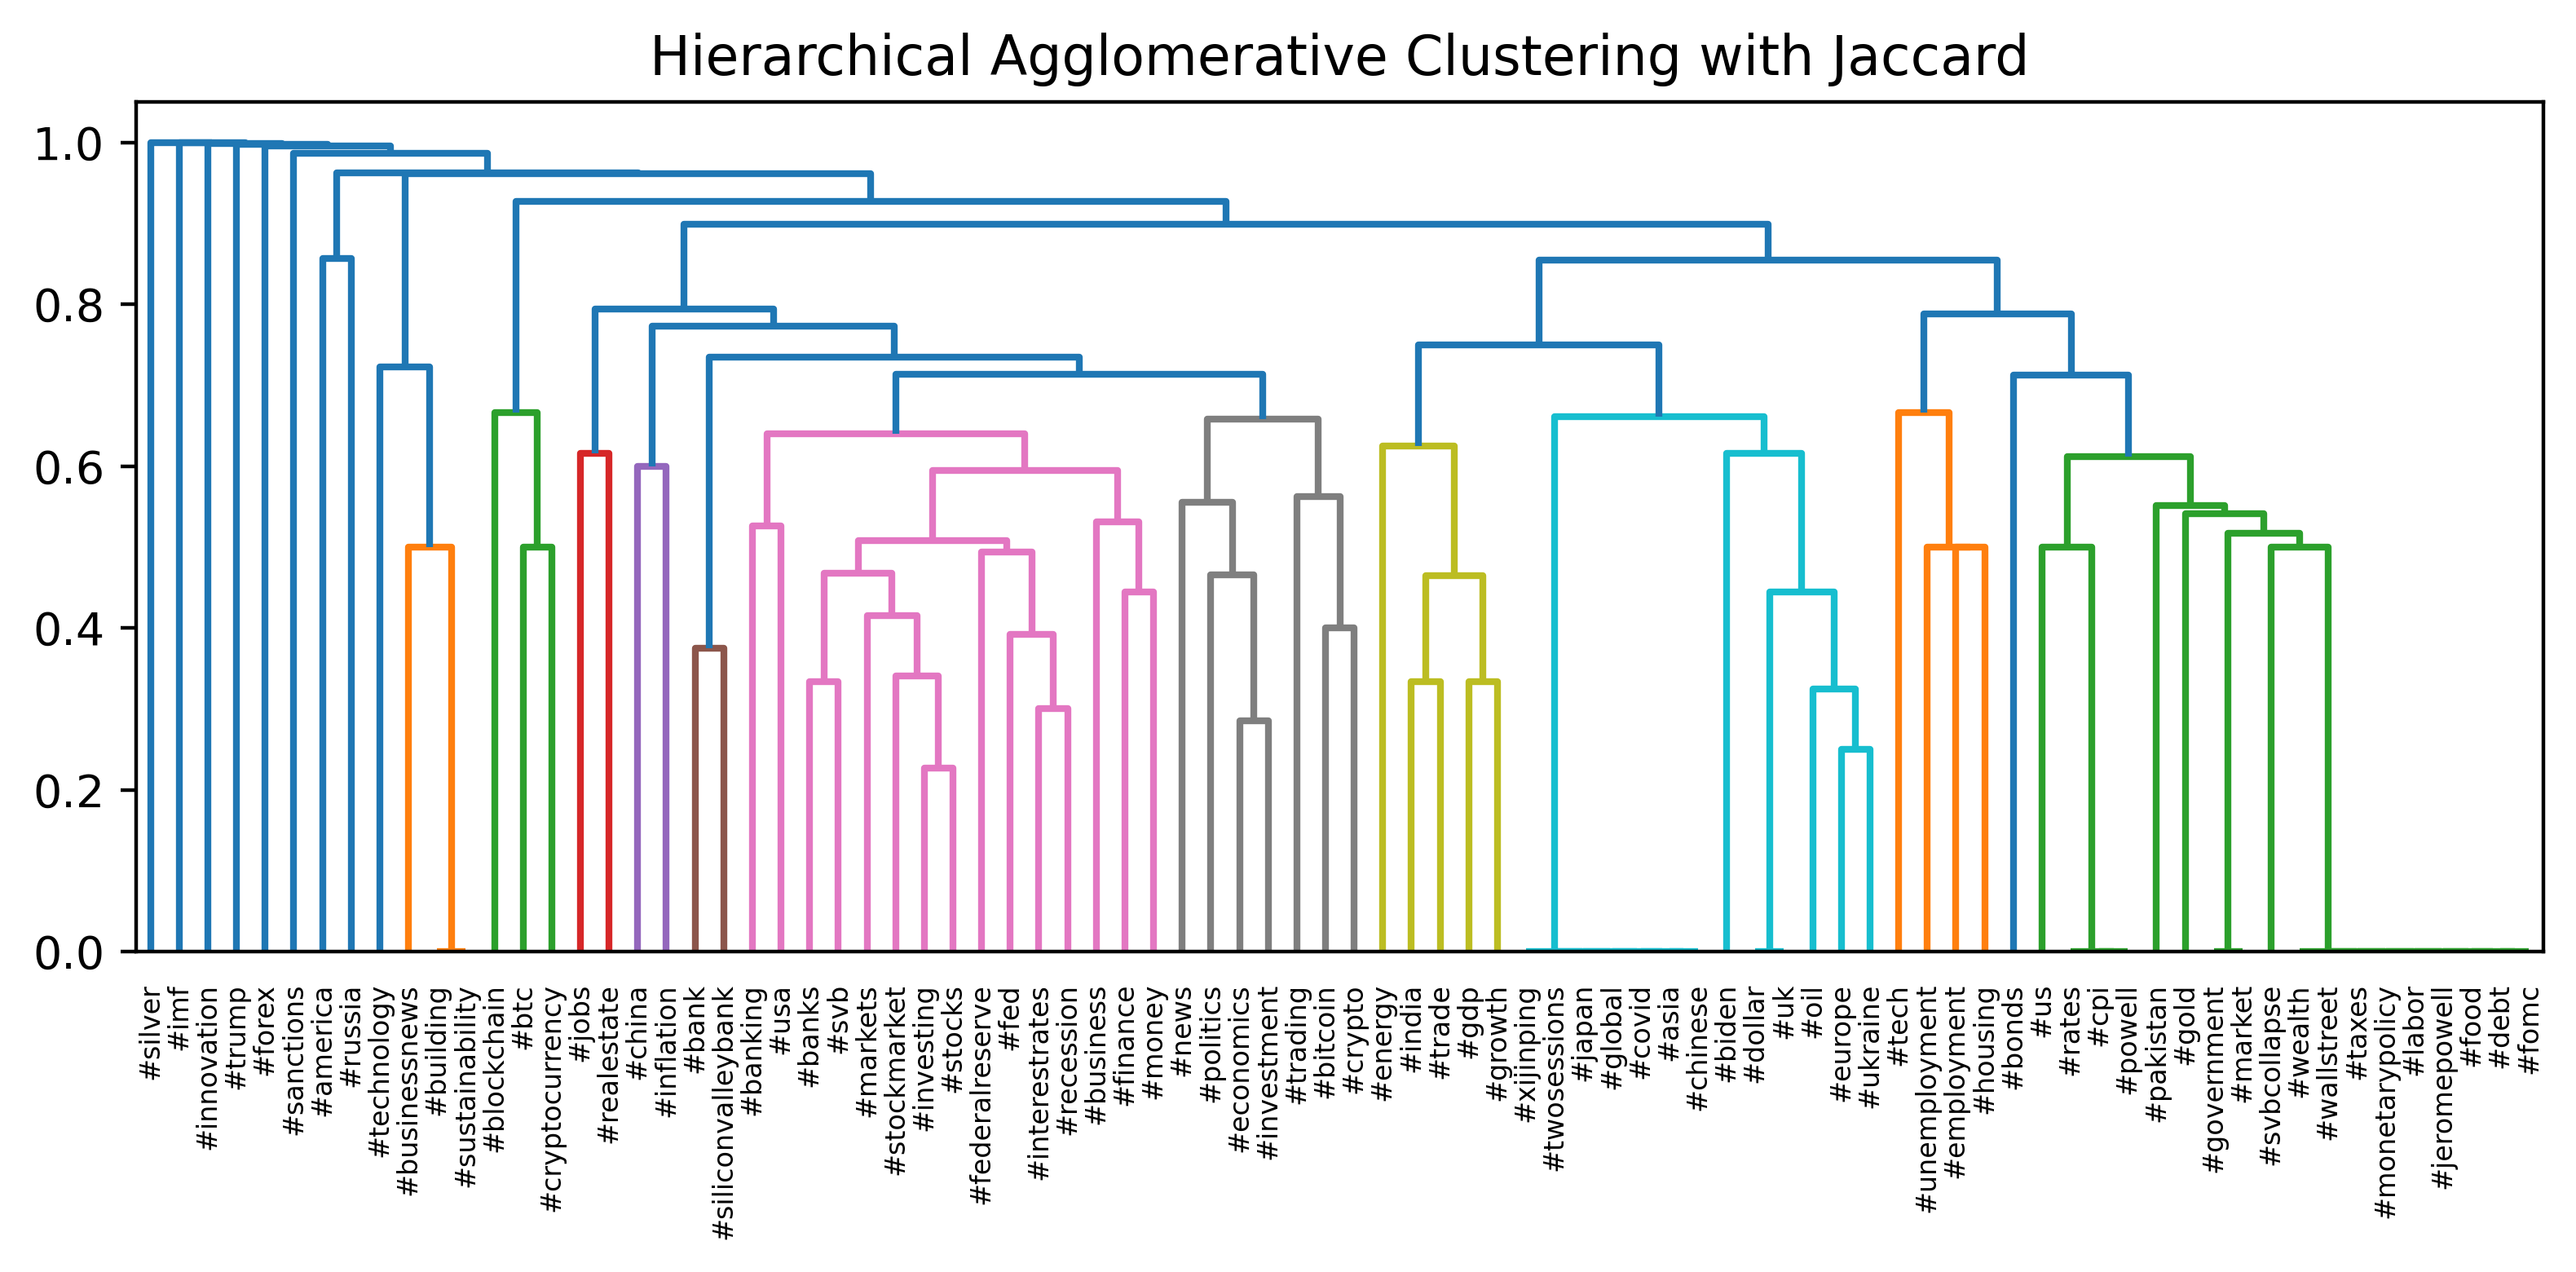

In [93]:
# Running the community detection function

G_economy_cummunity_var = community_detection(G_economy)

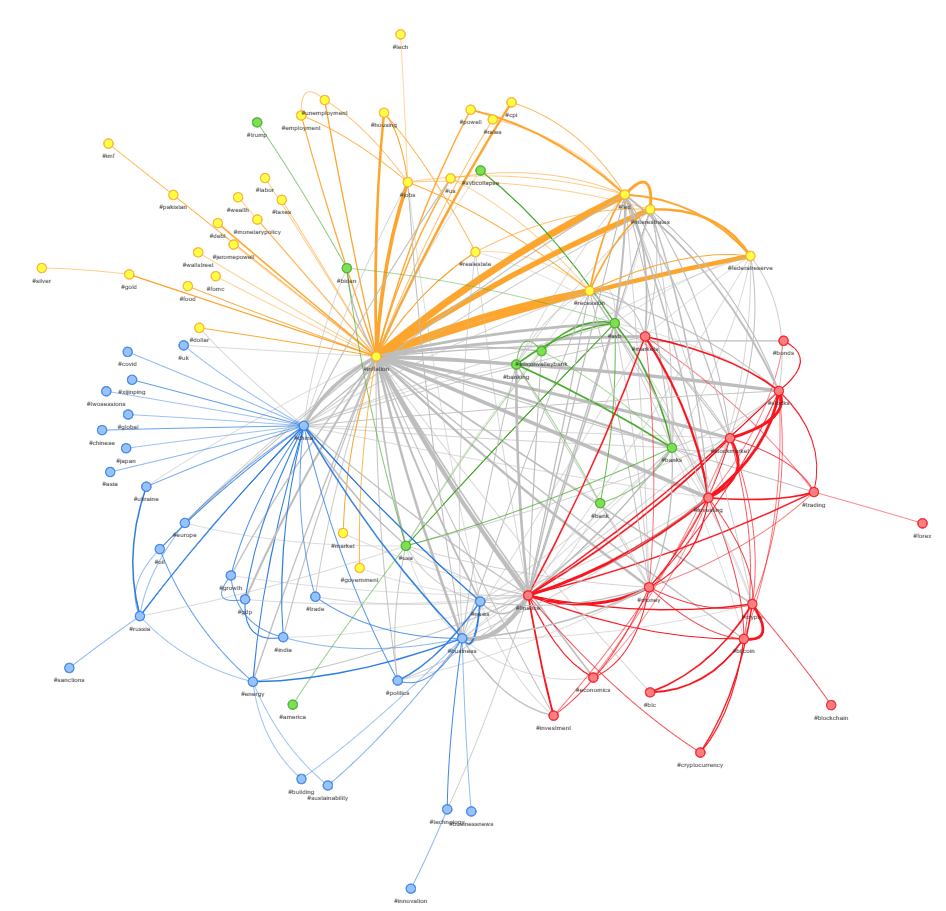

In [95]:
# Inspecting the community variables

G_economy_cummunity_var

C  N_c  L_c   d_c_int  k_c  k_c_int  k_c_ext  is_strong  is_weak
0  1   31   51  0.109677  186      102       84      False     True
1  2   16   47  0.391667  181       94       87      False     True
2  3   27   42  0.119658  145       84       61      False     True
3  4   10   17  0.377778   90       34       56      False    False

The economy communities were partitioned using L_modmax , which resulted in four communities, three of which are weak and one which is not a community. The node allocation is somewhat more even in this partition compared to the investing hashtag with two communities around the 30 node mark and the other two in a low to mid-teens range. The density also varies widely between the three weakly connected communities. Two communities are sparse, around the 10% mark, with the other community reaching almost 40% density.

The numerical difference between these communities is difficult to discern, as such they will be referred to by their colour. The blue community, appears to be a news centric conversational topic. It involves news, China, Europe, the US and moany other countries and regions. Politics, energy and business are also key conversational topics and as such it relates to the global political environment, from the war in Ukraine to the growing Chinese influence on the world stage. Therefore, this community should be titled as ‘News’. 

The yellow community is in possession of the highest degree node, inflation. This hashtag alone strongly influences the topics of conversation which relates to recession, interest rates and their affect on the banking sector, jobs, unemployment and real-estate. This topic would also cover the effect of inflation on the dollar and the precious metals market. Finally the federal reserve and prominent figures from this organisation such as Powell are included. An appropriate title for this community would be ‘Inflation’.

The red community, would be aptly title ‘Investing’. The topics of conversation revolve around investing in cryptocurrency, forex, the stock market and bonds.

The final community, which is neither strongly nor weakly connected is the coloured as green. The topics of conversation are wide ranging and loosely connected. The Silicon Valley Bank is a conversational topic, as is the USA , banks in general and Biden. It is also interesting to note that Trump is linked to Biden, suggesting that the two are frequently tweeted. There is no cohesive conversational topic which explaining the lack of community detection. The appropriate title would however be ‘Silicon Valley Bank’ as in the context of recent developments the failure of this bank has instigated the inclusion of these hashtags in a single tweet. 